<a href="https://colab.research.google.com/github/Bhaswati123/Statistics/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data=pd.read_csv('/content/olist_customers_dataset.csv')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geo_data=pd.read_csv('/content/olist_geolocation_dataset.csv')
geo_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
order_itemdata=pd.read_csv('/content/olist_order_items_dataset.csv')
order_itemdata

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
pay_data=pd.read_csv('/content/olist_order_payments_dataset.csv')
pay_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
rev_data=pd.read_csv('/content/olist_order_reviews_dataset.csv')
rev_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
orders=pd.read_csv('/content/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
order_prddata=pd.read_csv('/content/olist_products_dataset.csv')
order_prddata

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
order_selldata=pd.read_csv('/content/olist_sellers_dataset.csv')
order_selldata

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
order_prd_catdata=pd.read_csv('/content/product_category_name_translation.csv')
order_prd_catdata

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [ ]:
datasets=[data,geo_data,order_itemdata,pay_data,rev_data,orders,order_prddata,order_selldata,order_prd_catdata]
datasets

[                            customer_id                customer_unique_id  \
 0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 ...                                 ...                               ...   
 99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
 99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
 99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
 99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
 99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   
 
        customer_zip_code_prefix          customer_city custom

In [ ]:
titles=["customers","geolocations","items","payments","reviews","orders","products","sellers","category_translations"]

In [ ]:
info_df=pd.DataFrame({},)

info_df['dataset']=titles
info_df['no_of_columns']=[len(df.columns) for df in datasets]
info_df['columns_name']=[",".join(list(df.columns)) for df in datasets]
info_df['no_of_rows']=[len(df) for df in datasets]

info_df.style.background_gradient(cmap='Greys')

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state",99441
1,geolocations,5,"geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state",1000163
2,items,7,"order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value",112650
3,payments,5,"order_id,payment_sequential,payment_type,payment_installments,payment_value",103886
4,reviews,7,"review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp",99224
5,orders,8,"order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date",99441
6,products,9,"product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm",32951
7,sellers,4,"seller_id,seller_zip_code_prefix,seller_city,seller_state",3095
8,category_translations,2,"product_category_name,product_category_name_english",71


In [ ]:
#checking datatypes

datasets=[data,geo_data,order_itemdata,pay_data,rev_data,orders,order_prddata,order_selldata,order_prd_catdata]
titles=["customers","geolocations","items","payments","reviews","orders","products","sellers","category_translations"]

numerics=['int16','int32','int64','float16','float32','float64']

new_df=pd.DataFrame({},)
new_df['dataset']=titles
new_df['numeric_features']=[len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_feature_name']=[','.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features']=[len((df.select_dtypes(include=object)).columns) for df in datasets]
new_df['obj_feature_name']=[','.join(list((df.select_dtypes(include=object)).columns)) for df in datasets]
new_df['bool_features']=[len((df.select_dtypes(include=bool)).columns) for df in datasets]
new_df.style.background_gradient(cmap='Greys')

,dataset,numeric_features,num_feature_name,object_features,obj_feature_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id,customer_unique_id,customer_city,customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix,geolocation_lat,geolocation_lng",2,"geolocation_city,geolocation_state",0
2,items,3,"order_item_id,price,freight_value",4,"order_id,product_id,seller_id,shipping_limit_date",0
3,payments,3,"payment_sequential,payment_installments,payment_value",2,"order_id,payment_type",0
4,reviews,1,review_score,6,"review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp",0
5,orders,0,,8,"order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date",0
6,products,7,"product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm",2,"product_id,product_category_name",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id,seller_city,seller_state",0
8,category_translations,0,,2,"product_category_name,product_category_name_english",0


In [ ]:
#checking no of null values

datasets=[data,geo_data,order_itemdata,pay_data,rev_data,orders,order_prddata,order_selldata,order_prd_catdata]
titles=["customers","geolocations","items","payments","reviews","orders","products","sellers","category_translations"]

info_df_n=pd.DataFrame({},)
info_df_n['dataset']=titles
#creating column of name of columns in the dataset
info_df_n['cols']=[','.join([col for col,null in df.isnull().sum().items()]) for df in datasets]
#creating total number of columns in the dataset 
info_df_n['cols_no']=[df.shape[1] for df in datasets]
#counting total null values
info_df_n['null_no']=[df.isnull().sum().sum() for df in datasets]
#creating total number of columns in the dataset with null-values 
info_df_n['null_cols_no']=[len([col for col,null in df.isnull().sum().items() if null>0]) for df in datasets]
#creating column names in the dataset with null-values 
info_df_n['null_cols']=[','.join([col for col,null in df.isnull().sum().items() if null >0 ])for df in datasets]

info_df_n.style.background_gradient(cmap='Greys')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state",5,0,0,
1,geolocations,"geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state",5,0,0,
2,items,"order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value",7,0,0,
3,payments,"order_id,payment_sequential,payment_type,payment_installments,payment_value",5,0,0,
4,reviews,"review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp",7,145903,2,"review_comment_title,review_comment_message"
5,orders,"order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date",8,4908,3,"order_approved_at,order_delivered_carrier_date,order_delivered_customer_date"
6,products,"product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm",9,2448,8,"product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm"
7,sellers,"seller_id,seller_zip_code_prefix,seller_city,seller_state",4,0,0,
8,category_translations,"product_category_name,product_category_name_english",2,0,0,


In [ ]:
rev_new=rev_data.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)

In [ ]:
rev_new

,order_id,review_score,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,NaN
1,a548910a1c6147796b98fdf73dbeba33,5,NaN
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN
3,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,NaN
99220,22ec9f0669f784db00fa86d035cf8602,5,NaN
99221,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super..."
99222,7725825d039fc1f0ceb7635e3f7d9206,4,NaN


In [ ]:
df=pd.merge(orders, pay_data, on='order_id')
df=df.merge(data, on='customer_id')
df=df.merge(order_itemdata, on='order_id')
df=df.merge(order_prddata, on='product_id')
df=df.merge(order_prd_catdata, on='product_category_name')
df=df.merge(rev_new, on='order_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [ ]:
print("No. of rows:",len(df))
print('No. of columns:',len(df.columns))

No. of rows: 115609
No. of columns: 33


In [ ]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

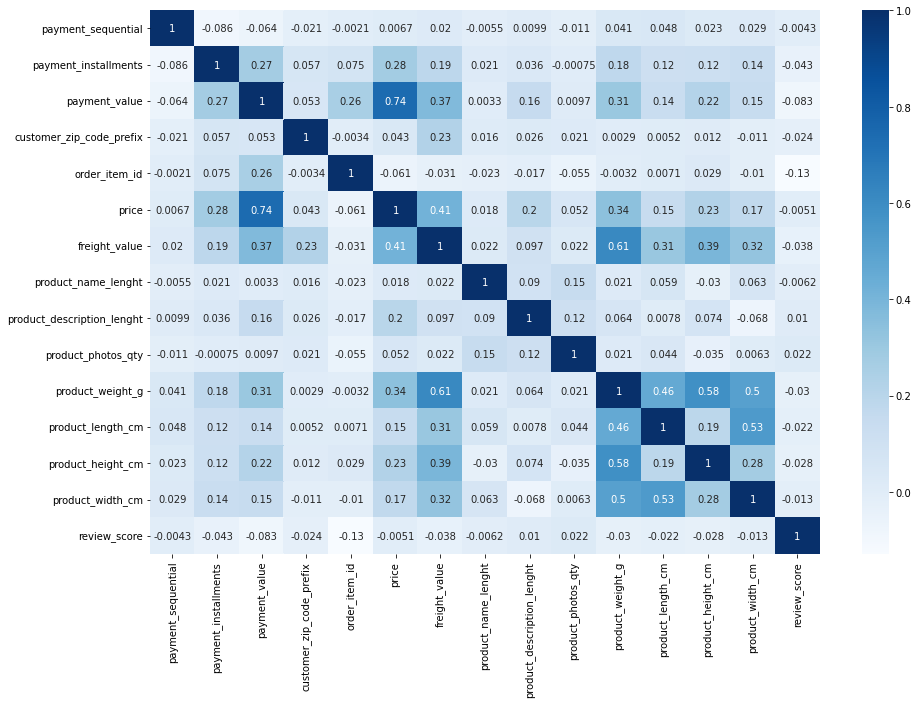

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

**Handling Missing Values**

In [ ]:
index=(df[df['order_delivered_customer_date'].isnull()==True].index.values)
index

array([    69,     87,    165, ..., 115510, 115530, 115541])

In [ ]:
df['order_approved_at'].fillna(df['order_purchase_timestamp'],inplace=True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'],inplace=True)

#dropping order delivery carrier date
df.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [ ]:
#checking the replaced values

df.order_estimated_delivery_date[index[0]]

'2017-07-06 00:00:00'

In [ ]:
df.order_delivered_customer_date[index[0]]

'2017-07-06 00:00:00'

In [ ]:
df.order_approved_at[index[0]]

'2017-06-24 14:55:21'

In [ ]:
df.order_purchase_timestamp[index[0]]

'2017-06-23 13:00:47'

In [ ]:
#Handling missing values of numerical features

df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)


In [ ]:
#Handling missing values of text column

print("percentage of null reviews:",df['review_comment_message'].isnull().sum()/len(df)*100)

df['review_comment_message'].fillna('no review',inplace=True)

percentage of null reviews: 57.697065107387836


In [ ]:
df.isnull().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm    

In [ ]:
dup_rows=df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','customer_unique_id','review_comment_message'])]
dup_rows.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,...,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,no review
9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,...,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,no review
10,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,...,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,no review


In [ ]:
#Deduplication of entries

df=df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'},keep='first',inplace=False)
df=df.reindex()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,no review
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,10,...,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,1,"Inicialmente, na data da compra o produto era ..."


In [ ]:
print("Number of rows after deduplication:",len(df))
print("Number of columns after deduplication:",len(df.columns))

Number of rows after deduplication: 96516
Number of columns after deduplication: 32


In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,no review
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,10,...,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,1,"Inicialmente, na data da compra o produto era ..."


In [ ]:
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']]=df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [ ]:
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           

In [ ]:
df.shape

(96516, 32)

In [ ]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.022545,2.919858,157.924421,35163.974543,1.016205,125.777851,20.220468,48.846253,794.118188,2.251015,2106.227133,30.147955,16.507771,23.061855,4.107412
std,0.247935,2.711997,216.773702,29810.746531,0.145692,189.535209,15.931328,9.995674,654.863686,1.746647,3764.648279,16.154906,13.339701,11.744019,1.329213
min,1.000000,0.000000,0.010000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.065000,11368.750000,1.000000,41.900000,13.300000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,103.190000,24422.000000,1.000000,79.000000,16.390000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,175.392500,59015.000000,1.000000,139.900000,21.260000,57.000000,996.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000
max,27.000000,24.000000,13664.080000,99980.000000,7.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [ ]:
#checking the target variable i.e review score

df.review_score.value_counts()

5    56185
4    18732
1    10598
3     7978
2     3023
Name: review_score, dtype: int64

In [ ]:
df['review_score']=df['review_score'].apply([lambda x: 0 if x<3 else 1])

In [ ]:
df['review_score'].value_counts()

1    82895
0    13621
Name: review_score, dtype: int64

In [ ]:
y_value_counts=df['review_score'].value_counts()

print("Total positive values:",y_value_counts[1],",",(y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%")
print("Total negative values:",y_value_counts[0],",",(y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%")

Total positive values: 82895 , 85.8873140204733 %
Total negative values: 13621 , 14.11268597952671 %


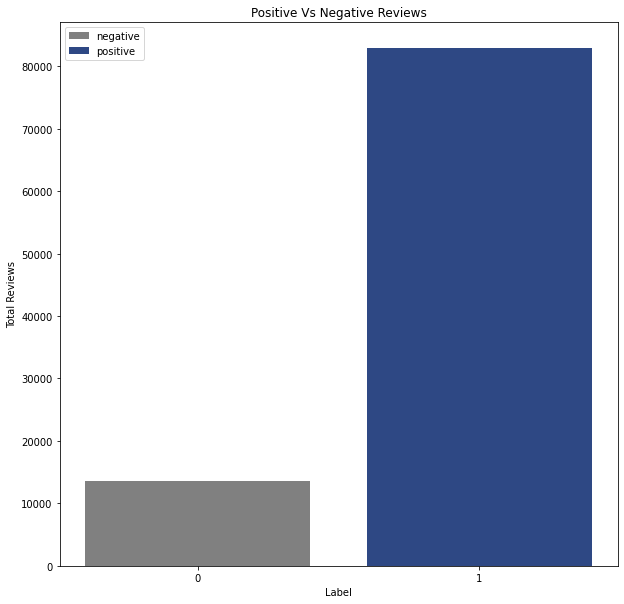

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Label')
plt.ylabel('Total Reviews')
plt.title('Positive Vs Negative Reviews')
plt.bar('0',df['review_score'].value_counts()[0],color='Grey',label='negative')
plt.bar('1',df['review_score'].value_counts()[1],color='#2e4884',label='positive')
plt.legend()

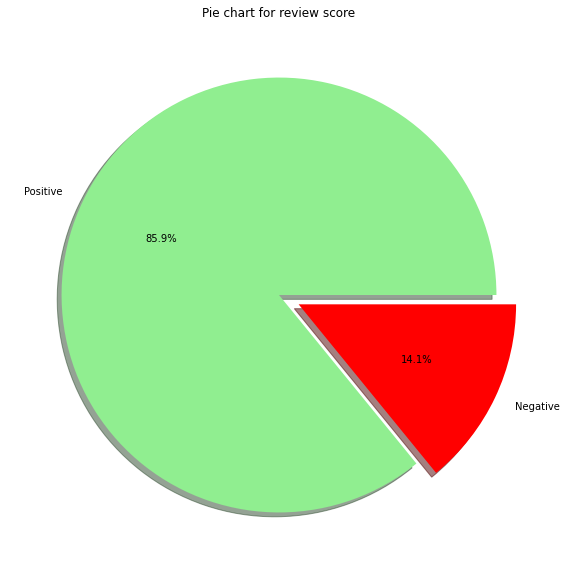

In [ ]:
plt.figure(figsize=(10,10))
labels=['Positive','Negative']
sizes=[y_value_counts[1],y_value_counts[0]]
explode=(0,0.1)
color=('LightGreen','Red')
plt.pie(sizes,labels=labels,colors=color,explode=explode,autopct="%1.1f%%",shadow=True)
plt.title("Pie chart for review score")
plt.show()

In [ ]:
#finding corr- values of the features with review_score

df.corr().review_score.sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.018062
product_description_lenght    0.009772
product_name_lenght           0.000142
payment_sequential           -0.005510
product_width_cm             -0.011653
customer_zip_code_prefix     -0.012370
product_length_cm            -0.015065
price                        -0.021429
product_height_cm            -0.023263
product_weight_g             -0.028432
freight_value                -0.036847
payment_installments         -0.037339
payment_value                -0.053558
order_item_id                -0.065218
Name: review_score, dtype: float64

In [ ]:
df['seller_id']

0         3504c0cb71d7fa48d967e0e4c94d59d9
3         3504c0cb71d7fa48d967e0e4c94d59d9
4         3504c0cb71d7fa48d967e0e4c94d59d9
5         3504c0cb71d7fa48d967e0e4c94d59d9
6         f5f46307a4d15880ca14fab4ad9dfc9b
                        ...               
115603    fd386aa7bed2af3c7035c65506c9b4a3
115604    2cb6eb1b7185064167657fa09f541105
115605    ef728fa1f17436c91ed1ccd03dcf9631
115607    48162d548f5b1b11b9d29d1e01f75a61
115608    4e922959ae960d389249c378d1c939f5
Name: seller_id, Length: 96516, dtype: object

In [ ]:
df['customer_id']

0         9ef432eb6251297304e76186b10a928d
3         a20e8105f23924cd00833fd87daa0831
4         26c7ac168e1433912a51b924fbd34d34
5         53904ddbea91e1e92b2b3f1d09a7af86
6         c7340080e394356141681bd4c9b8fe31
                        ...               
115603    6c60b00bcbef919c1697d18c309a99fe
115604    986632b40c38f4240caf8608cb01d40d
115605    ee1cfdc92e449920e25d3ca4ab4da4f6
115607    363d3a9b2ec5c5426608688ca033292d
115608    919570a26efbd068d6a0f66d5c5072a3
Name: customer_id, Length: 96516, dtype: object

In [ ]:
df['product_id']

0         87285b34884572647811a353c7ac498a
3         87285b34884572647811a353c7ac498a
4         87285b34884572647811a353c7ac498a
5         87285b34884572647811a353c7ac498a
6         be021417a6acb56b9b50d3fd2714baa8
                        ...               
115603    1cf657de01c2b973b898ad0ac9073ac7
115604    4a24717893a6c8f3cfcf9843b8987d15
115605    9c313adb4b38a55b092f53f83f78be9e
115607    6c7a0a349ad11817745e3ad58abd5c79
115608    8db75af9aed3315374db44d7860e25da
Name: product_id, Length: 96516, dtype: object

In [ ]:
print("The number of seller_id:-",len(df.seller_id))
print("The number of unique seller_id:-",len((df.seller_id).unique()))
print("The number of customer_id:-",len(df.customer_id))
print("The number of unique customer_id:-",len((df.customer_id).unique()))
print("The number of product_id:-",len(df.product_id))
print("The number of unique product_id:-",len((df.product_id).unique()))

The number of seller_id:- 96516
The number of unique seller_id:- 3017
The number of customer_id:- 96516
The number of unique customer_id:- 96516
The number of product_id:- 96516
The number of unique product_id:- 30905


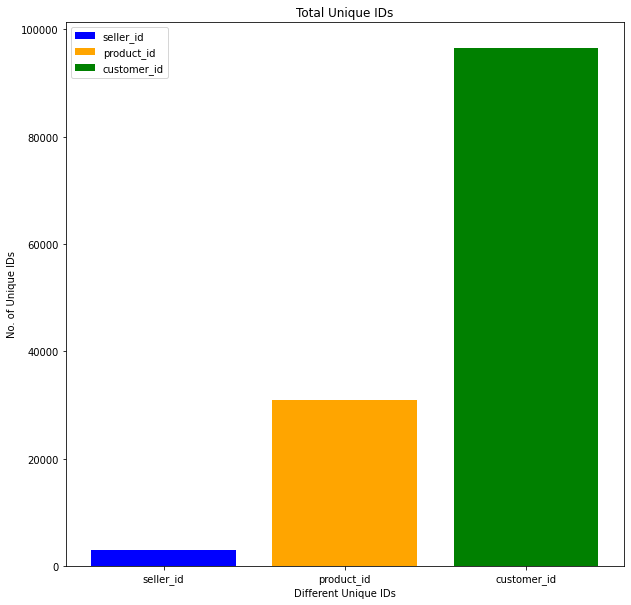

In [ ]:
plt.figure(figsize=(10,10))
plt.ylabel("No. of Unique IDs")
plt.xlabel("Different Unique IDs")
plt.title("Total Unique IDs")

plt.bar('seller_id',len((df.seller_id).unique()),color='Blue',label='seller_id')
plt.bar('product_id',len((df.product_id).unique()),color='orange',label='product_id')
plt.bar('customer_id',len((df.customer_id).unique()),color='green',label='customer_id')

plt.legend()

**Uivariate Analysis: payment_type**

In [ ]:
df['payment_type'].value_counts()

credit_card    73251
boleto         19203
voucher         2578
debit_card      1484
Name: payment_type, dtype: int64

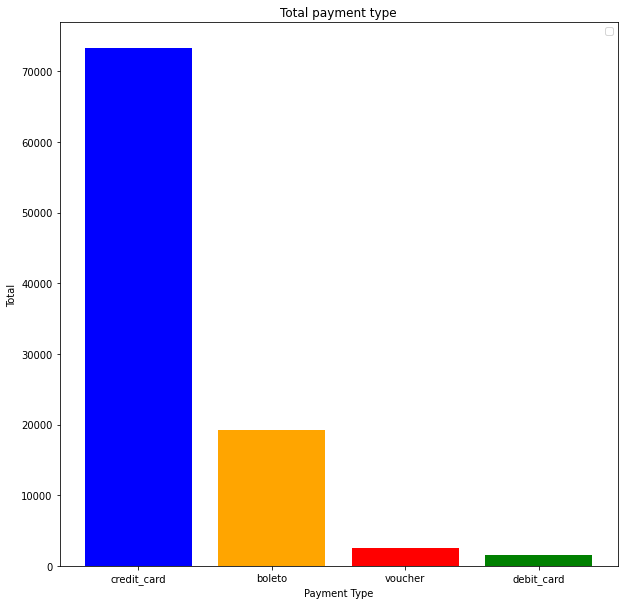

In [ ]:
#Bar Plot

plt.figure(figsize=(10,10))
plt.xlabel("Payment Type")
plt.ylabel("Total")
plt.title("Total payment type")
x=['credit_card','boleto','voucher','debit_card']
y=[73251,19203,2578,1484]
color=['Blue','orange','red','green']
plt.bar(x,y,color=color)
plt.legend()

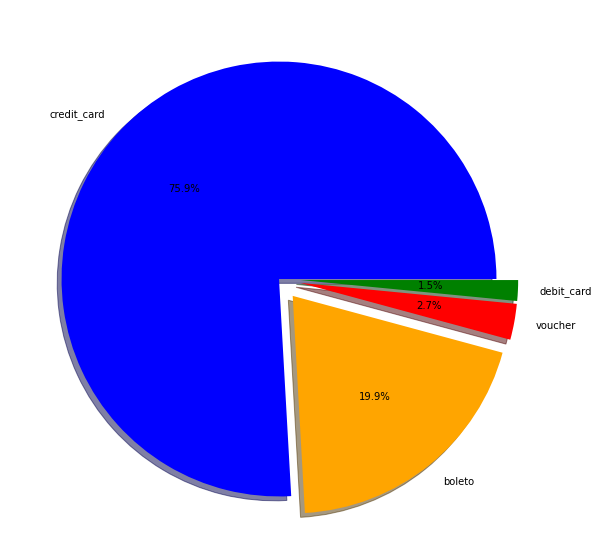

In [ ]:
#Pie Chart

plt.figure(figsize=(10,10))
labels=['credit_card','boleto','voucher','debit_card']
sizes=[73251,19203,2578,1484]
color=['Blue','orange','red','green']
explode=(0,0.1,0.1,0.1)
plt.pie(sizes,labels=labels,colors=color,explode=explode,autopct='%0.1f%%',shadow=True)
plt.show()

In [ ]:
temp=pd.DataFrame(df.groupby('payment_type')['review_score'].agg(lambda x:x.eq(1).sum())).reset_index()
temp

,payment_type,review_score
0,boleto,16554
1,credit_card,62856
2,debit_card,1296
3,voucher,2189


In [ ]:
temp['total']=list(pd.DataFrame(df.groupby('payment_type')['review_score'].agg([('total','count'),('avg','mean')]))['total'])
temp['avg']=list(pd.DataFrame(df.groupby('payment_type')['review_score'].agg([('total','count'),('avg','mean')]))['avg'])
temp.sort_values(by=['total'],ascending=True)

,payment_type,review_score,total,avg
2,debit_card,1296,1484,0.873315
3,voucher,2189,2578,0.849108
0,boleto,16554,19203,0.862053
1,credit_card,62856,73251,0.858091


In [ ]:
def pareto_plot(df,x=None,y=None,title=None,show_pct_y=False, pct_format='{0:.0%}'):
  xlabel=x
  ylabel=y
  tmp=df.sort_values(y,ascending=False)
  x=tmp[x].values
  y=tmp[y].values
  weights=y/y.sum()
  cumsum=weights.cumsum()

  fig,ax1=plt.subplots(figsize=(10,10))
  ax1.bar(x,y,color='Blue')
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel(ylabel)

  ax2=ax1.twinx()
  ax2.plot(x, cumsum, '-ro')
  ax2.set_ylabel('',color='r')
  ax2.tick_params('y',colors='r')

  vals=ax2.get_yticks()
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

  if not show_pct_y:
    ax2.set_yticks([])

  formatted_weights=[pct_format.format(x) for x in cumsum]
  for i, txt in enumerate(formatted_weights):
    ax2.annotate(txt, (x[i],cumsum[i]),fontsize=15)
  
  if title:
    plt.title(title,color='dimgrey',fontsize=15)
  
  plt.tight_layout()
  plt.show()


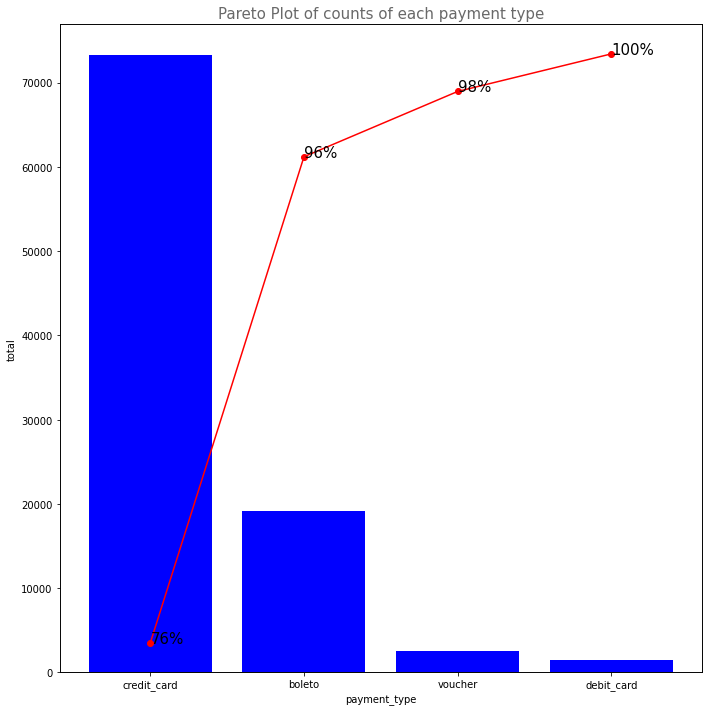

In [ ]:
pareto_plot(temp,x='payment_type',y='total',title='Pareto Plot of counts of each payment type')

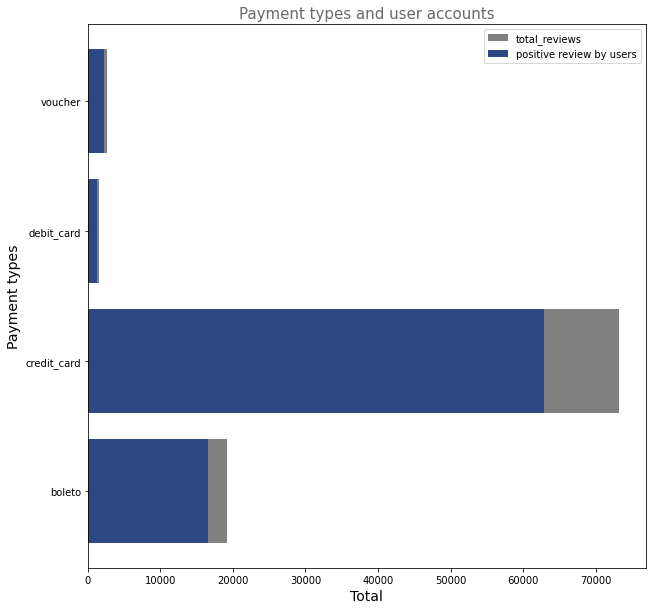

In [ ]:
#Let us see how this categorical feature related with our target variable

plt.figure(figsize=(10,10))
p1=plt.barh(temp.payment_type,temp.total,color='grey')
p2=plt.barh(temp.payment_type,temp.review_score,color='#2e4884')
plt.title('Payment types and user accounts',color='dimgrey',fontsize=15)
plt.ylabel('Payment types',fontsize=14)
plt.xlabel('Total',fontsize=14)
plt.legend((p1[0],p2[0]), ('total_reviews','positive review by users'))
plt.show()

**Univariate Analysis: Customer count based on State wise**


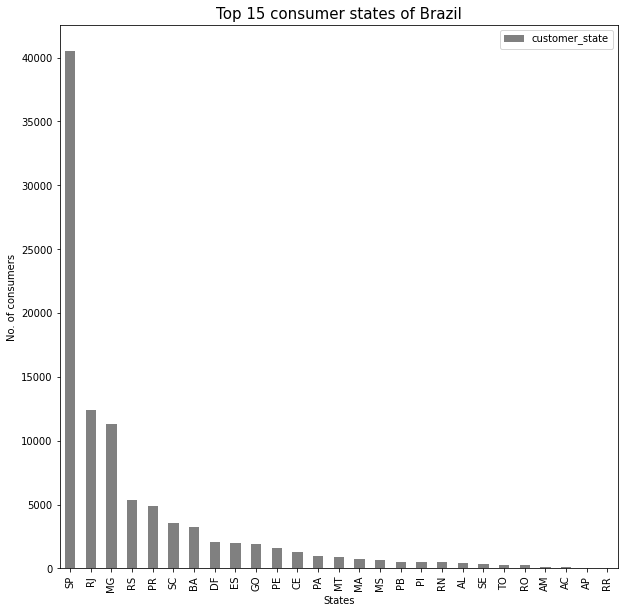

In [ ]:
plt.figure(figsize=(10,10))
ax=df.customer_state.value_counts().sort_values(ascending=False).plot(kind='bar',color='grey')
ax.set_title("Top 15 consumer states of Brazil",fontsize=15)
ax.set_xlabel("States")
ax.set_ylabel("No. of consumers")
plt.legend()
plt.show()

In [ ]:
def stack_plot(data,xtick,col2,col3='total'):
  ind=np.arange(data.shape[0])

  plt.figure(figsize=(10,10))
  p1=plt.bar(ind,data[col3].values,color='grey')
  p2=plt.bar(ind,data[col2].values,color='#2e4884')

  plt.ylabel('Reviews')
  plt.title('% of review score')
  plt.xticks(ind-0.1, list(data[xtick].values))
  plt.legend((p1[0],p2[1]),('total_reviews','positive_review'))
  plt.show()

In [ ]:
# Count number of zeros in dataframe python

temp_1=pd.DataFrame(df.groupby('customer_state')['review_score'].agg(lambda x:x.eq(1).sum()).reset_index())
temp_1

,customer_state,review_score
0,AC,66
1,AL,309
2,AM,124
3,AP,62
4,BA,2671
5,CE,1057
6,DF,1779
7,ES,1694
8,GO,1668
9,MA,569


In [ ]:
temp_1['total']=list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('avg','mean')]))['total'])
temp_1['avg']=list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('avg','mean')]))['avg'])
temp_1=temp_1.rename(columns={'review_score':'positive_review'})
temp_1=temp_1.sort_values(by=['total'],ascending=False)
temp_1

,customer_state,positive_review,total,avg
25,SP,35697,40536,0.880625
18,RJ,9907,12410,0.798308
10,MG,9851,11297,0.872001
22,RS,4641,5331,0.870568
17,PR,4319,4902,0.881069
23,SC,3031,3526,0.859614
4,BA,2671,3277,0.815075
6,DF,1779,2084,0.853647
7,ES,1694,1981,0.855124
8,GO,1668,1946,0.857143


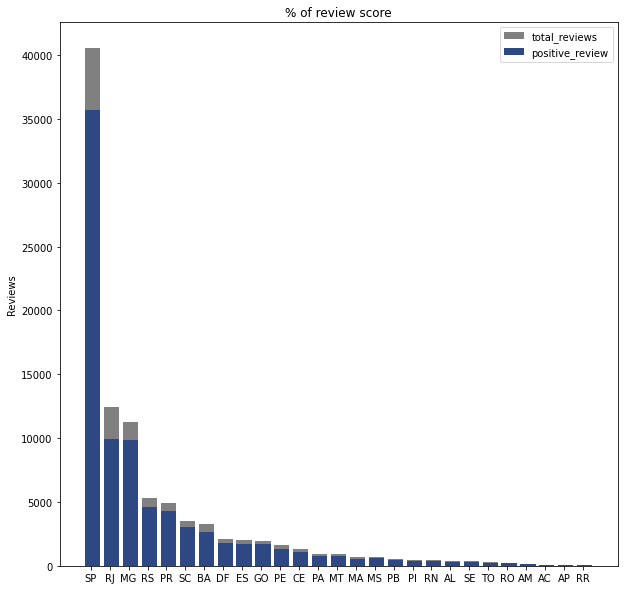

In [ ]:
stack_plot(temp_1,'customer_state',col2='positive_review',col3='total')

**Univariate Analysis: product_category_name_english**


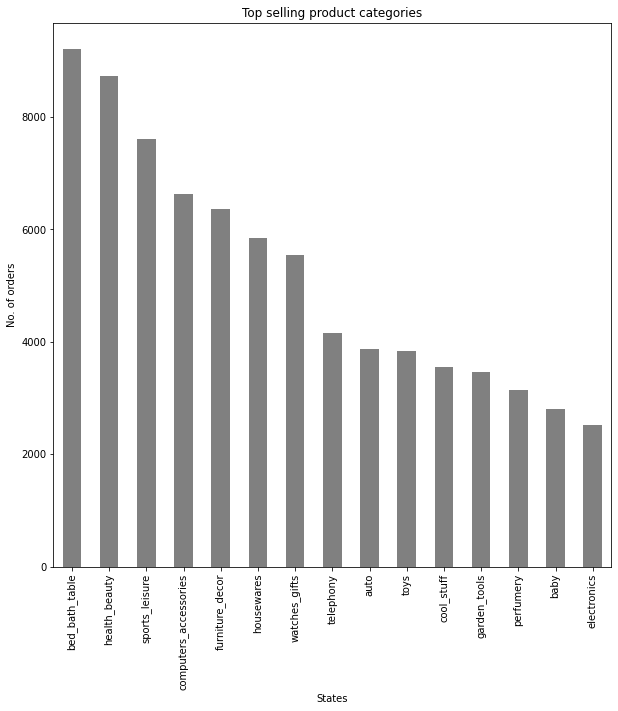

In [ ]:
plt.figure(figsize=(10,10))
ax=df.product_category_name_english.value_counts().sort_values(ascending=False)[0:15].plot(kind="bar",color="grey")
ax.set_title("Top selling product categories")
ax.set_xlabel("States")
ax.set_ylabel("No. of orders")
plt.show()

In [ ]:
temp_2=pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg(lambda x:x.eq(1).sum()).reset_index())
temp_2['total']=list(pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg([('total','count'),('avg','mean')]))['total'])
temp_2['avg']=list(pd.DataFrame(df.groupby('product_category_name_english')['review_score'].agg([('total','count'),('avg','mean')]))['avg'])
temp_2.sort_values(by=['total'],ascending=True)

,product_category_name_english,review_score,total,avg
61,security_and_services,1,2,0.500000
29,fashion_childrens_clothes,5,6,0.833333
52,la_cuisine,10,11,0.909091
11,cds_dvds_musicals,12,12,1.000000
3,arts_and_craftmanship,19,21,0.904762
...,...,...,...,...
39,furniture_decor,5310,6366,0.834119
15,computers_accessories,5569,6627,0.840350
65,sports_leisure,6639,7613,0.872061
43,health_beauty,7631,8732,0.873912


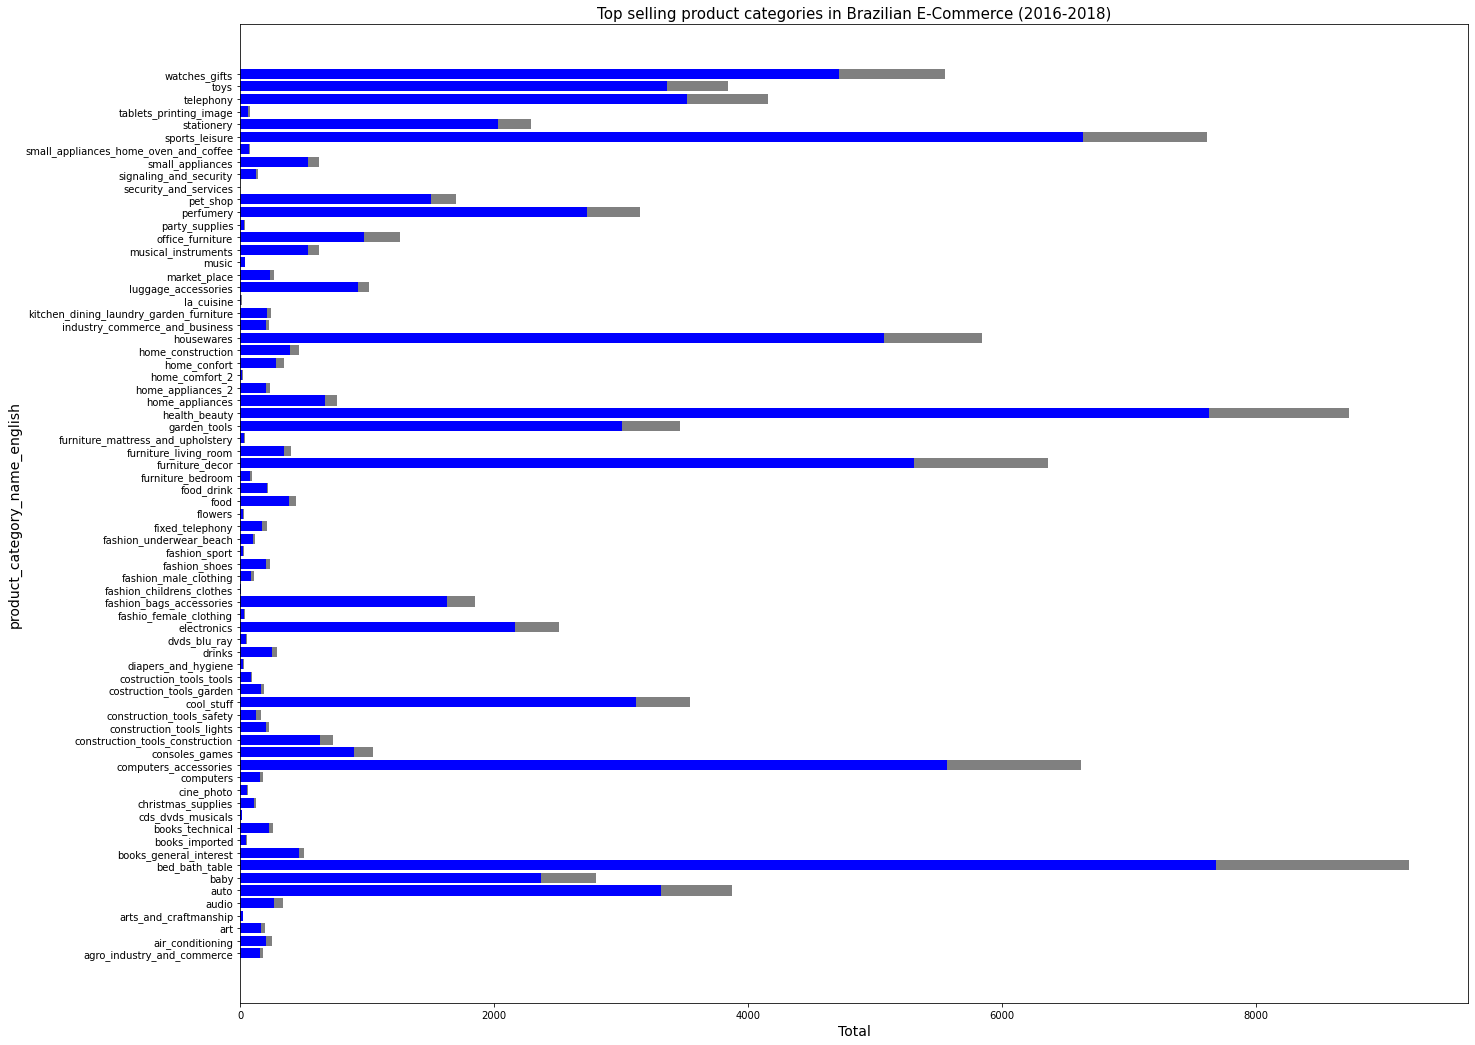

In [ ]:
plt.figure(figsize=(22,18))
plt.barh(temp_2.product_category_name_english,temp_2.total,color='grey')
plt.barh(temp_2.product_category_name_english,temp_2.review_score,color='Blue')
plt.title("Top selling product categories in Brazilian E-Commerce (2016-2018)",fontsize=15)
plt.xlabel("Total",fontsize=14)
plt.ylabel("product_category_name_english",fontsize=14)
plt.show()

**Uivarite Analysis:frequency of orders Vs Number of Consumers**

Text(0.5, 1.0, 'No. of orders per customers')

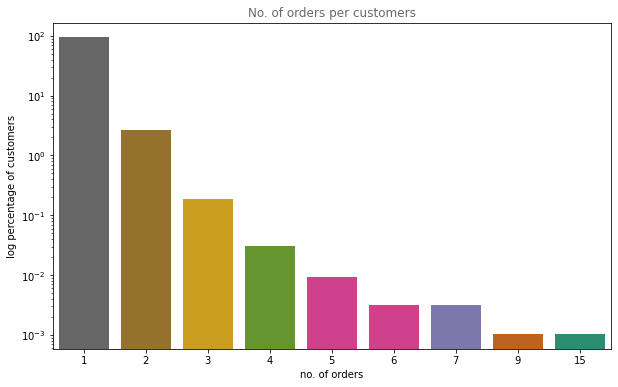

In [ ]:
plt.figure(figsize=(10,6))
num_orders=df['customer_unique_id'].value_counts().value_counts()/df.shape[0]*100
num_orders=num_orders.reset_index()

num_orders.rename(columns={'index':'no. of orders','customer_unique_id':'log percentage of customers'},inplace=True)

sns.barplot(data=num_orders,x='no. of orders',y='log percentage of customers',palette='Dark2_r')
plt.yscale('log')
plt.title('No. of orders per customers',color='dimgrey')

**Univariate Analysis: Order_status**

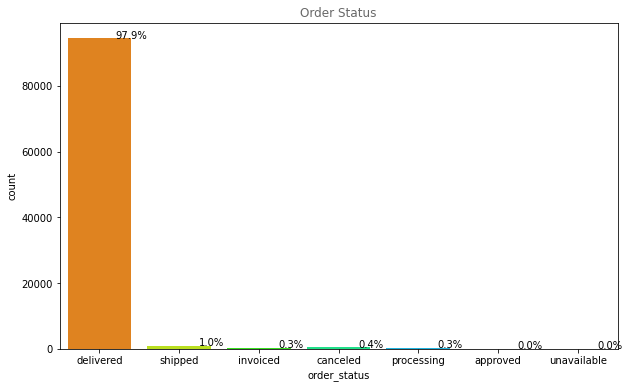

In [ ]:
plt.figure(figsize=(10,6))
total=float(len(df))
ax=sns.countplot(data=df,x='order_status',palette='gist_rainbow')
ax.set_title('Order Status',color='dimgrey')
for p in ax.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  x=p.get_x()+p.get_width()
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.show()

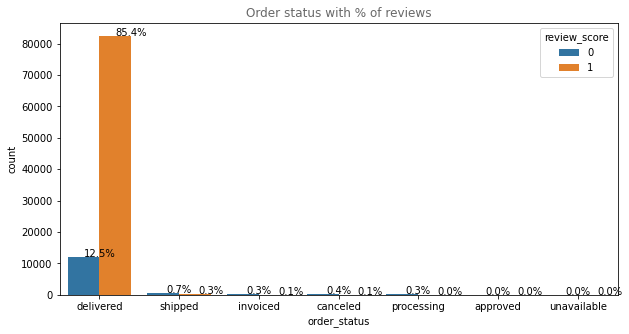

In [ ]:
plt.figure(figsize=(10,5))
total=float(len(df))
ax=sns.countplot(data=df,x='order_status',hue='review_score')
ax.set_title('Order status with % of reviews',color='dimgrey')
for p in ax.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  x=p.get_x()+p.get_width()
  y=p.get_height()
  ax.annotate(percentage,(x,y),ha='center')
plt.show()

**Univariate Analysis on different Timestamps**

In [ ]:
#calculating number of days for the data is taken

print(df.order_approved_at.max() - df.order_approved_at.min(), 'from',
      df.order_approved_at.min(), 'to' ,df.order_approved_at.max())

699 days 07:56:34 from 2016-10-04 09:43:32 to 2018-09-03 17:40:06


In [ ]:
# Extracting attributes for purchase date - Year and Month

df['order_purchase_year']=df['order_purchase_timestamp'].apply(lambda x:x.year) #gives year
df['order_purchase_month']=df['order_purchase_timestamp'].apply(lambda x:x.month) #gives month
df['order_purchase_month_name']=df['order_purchase_timestamp'].apply(lambda x:x.strftime('%b')) #gives month in short form
df['order_purchase_year_month']=df['order_purchase_timestamp'].apply(lambda x:x.strftime('%Y%m')) #gives month and year
df['order_purchase_date']=df['order_purchase_timestamp'].apply(lambda x:x.strftime('%Y%m%d')) #gives month, year and date
df['order_purchase_month_yr']=df['order_purchase_timestamp'].apply(lambda x:x.strftime('%b-%Y')) 

# Extracting attributes for purchase date - Day and Day of Week
df['order_purchase_day']=df['order_purchase_timestamp'].apply(lambda x:x.day)
df['order_purchase_dayofweek']=df['order_purchase_timestamp'].apply(lambda x:x.dayofweek)
df['order_purchase_dayofweek_name']=df['order_purchase_timestamp'].apply(lambda x:x.strftime('%a'))


# Extracting attributes for purchase date - Hour and Time of the Day
df['order_purchase_hour']=df['order_purchase_timestamp'].apply(lambda x:x.hour)
hours_bins=[-0.1,6,12,18,23]
hours_labels=['Dawn','Morning','Afternoon','Night']
df['order_purchase_time_day']=pd.cut(df['order_purchase_hour'],hours_bins,labels=hours_labels)

# New DataFrame after transformations
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,10,Oct,201710,20171002,Oct-2017,2,0,Mon,10,Morning
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,8,Aug,201708,20170815,Aug-2017,15,1,Tue,18,Afternoon
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,8,Aug,201708,20170802,Aug-2017,2,2,Wed,18,Afternoon
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,...,10,Oct,201710,20171023,Oct-2017,23,0,Mon,23,Night
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,...,11,Nov,201711,20171124,Nov-2017,24,4,Fri,21,Night


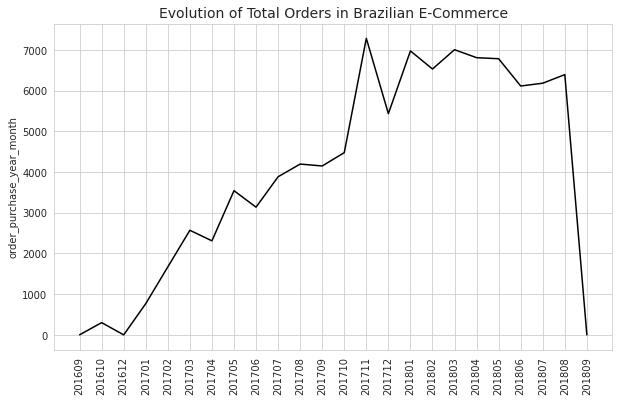

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=df['order_purchase_year_month'].value_counts().sort_index(),color='black')
plt.title('Evolution of Total Orders in Brazilian E-Commerce',size=14)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_month=pd.DataFrame()
df_month['date'],df_month['review_score']=list(df.order_approved_at),list(df.review_score)
df_month=df_month.dropna()
df_month=df_month.sort_values(by=['date'])
df_month

,date,review_score
92268,2016-10-04 09:43:32,1
79356,2016-10-04 10:18:57,0
93384,2016-10-04 10:19:23,1
2726,2016-10-04 10:25:46,0
23027,2016-10-04 10:28:07,0
...,...,...
56961,2018-08-29 14:30:23,1
93211,2018-08-29 14:31:07,1
90709,2018-08-29 15:05:22,1
30295,2018-08-29 15:10:26,1


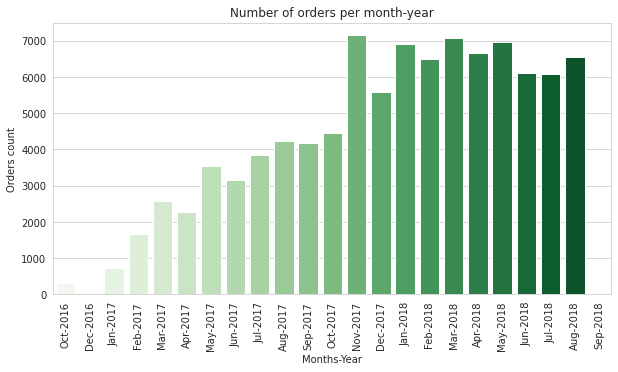

In [ ]:
plt.figure(figsize=(10,5))
df_month['monthcount']=list(df_month.date.apply(lambda x:x.strftime('%b-%Y')))
g=sns.countplot(data=df_month, x=df_month.monthcount,palette='Greens')
g.set_xlabel('Months-Year')
g.set_ylabel('Orders count')
g.set_title('Number of orders per month-year')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

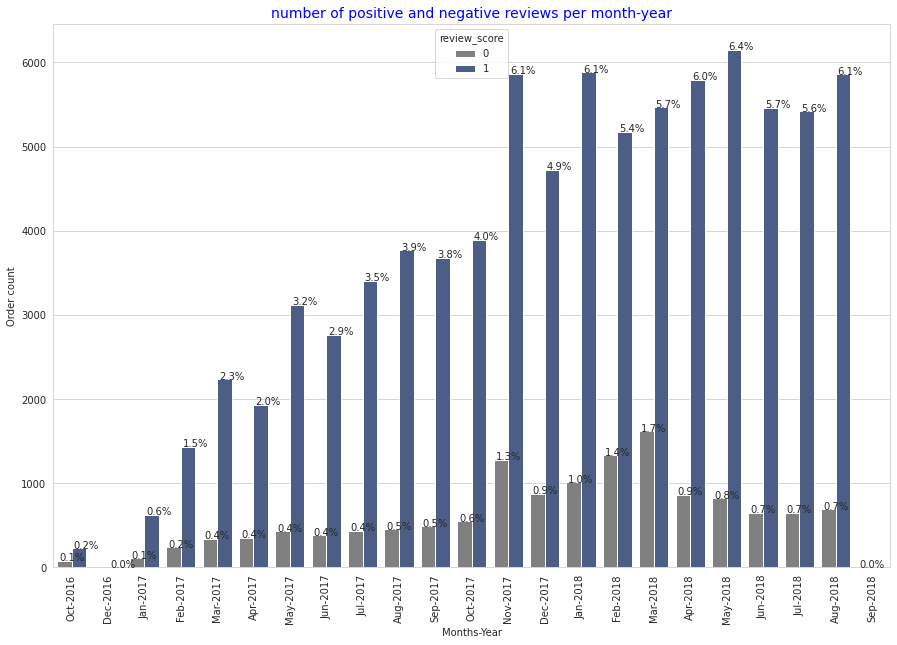

In [ ]:
#plotting number of positive and negative reviews per month-year

plt.figure(figsize=(15,10))
g=sns.countplot(data=df_month, x=df_month.monthcount, hue='review_score',palette=['grey','#425a90'])
total=float(len(df_month))
g.set_xlabel('Months-Year')
g.set_ylabel('Order count')
g.set_title('number of positive and negative reviews per month-year',size=14,color='Blue')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  x=p.get_x() + p.get_width()
  y=p.get_height()
  g.annotate(percentage,(x,y),ha='center')
plt.show()

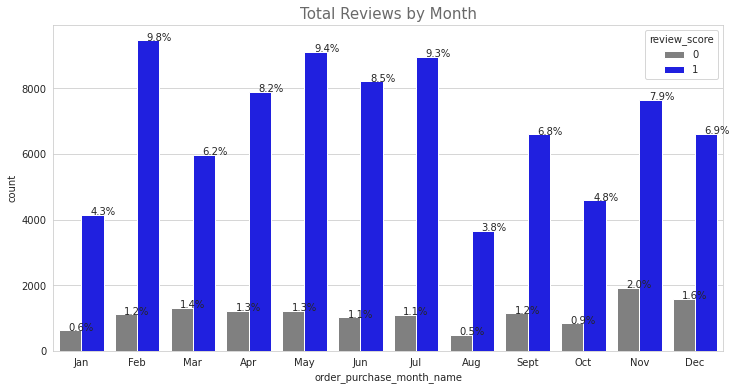

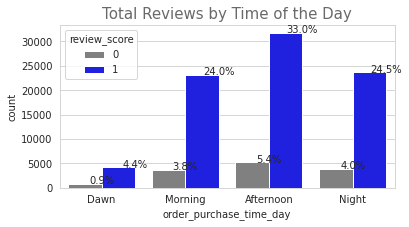

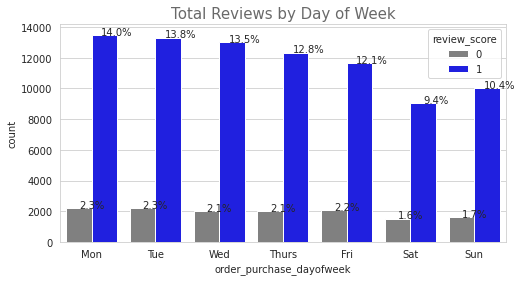

In [ ]:
total=float(len(df))

plt.figure(figsize=(12,6))
ax1=sns.countplot(data=df, x='order_purchase_month_name',hue='review_score',palette=['grey','blue'])
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
ax1.set_title('Total Reviews by Month',size=15,color='dimgrey')
for p in ax1.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  x=p.get_x() + p.get_width()
  y=p.get_height()
  ax1.annotate(percentage,(x,y),ha='center')
plt.show()

plt.figure(figsize=(6,3))
ax2=sns.countplot(data=df, x='order_purchase_time_day',palette=['grey','blue'],hue='review_score')
ax2.set_title('Total Reviews by Time of the Day',size=15,color='dimgrey')
for p in ax2.patches:
  percentage='{:.1f}%'.format(100*p.get_height()/total)
  x=p.get_x() + p.get_width()
  y=p.get_height()
  ax2.annotate(percentage,(x,y),ha='center')
plt.show()

plt.figure(figsize=(8,4))
ax3=sns.countplot(data=df, x='order_purchase_dayofweek',hue='review_score',palette=['grey','blue'])
ax3.set_xticklabels(['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
ax3.set_title('Total Reviews by Day of Week',size=15,color='dimgrey')

for p in ax3.patches:
  percentage='{:.1f}%'.format(100*(p.get_height()/total))
  x=p.get_x()+p.get_width()
  y=p.get_height()
  ax3.annotate(percentage,(x,y),ha='center')
plt.show()



In [ ]:
df['day_to_delivery']=((df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days)

df_dev=pd.DataFrame()
df_dev['day_to_delivery'],df_dev['review_score']=list(df.day_to_delivery),list(df.review_score)
df_dev.dropna()

,day_to_delivery,review_score
0,8,1
1,2,1
2,5,1
3,14,1
4,33,0
...,...,...
96511,8,1
96512,6,1
96513,3,1
96514,19,1


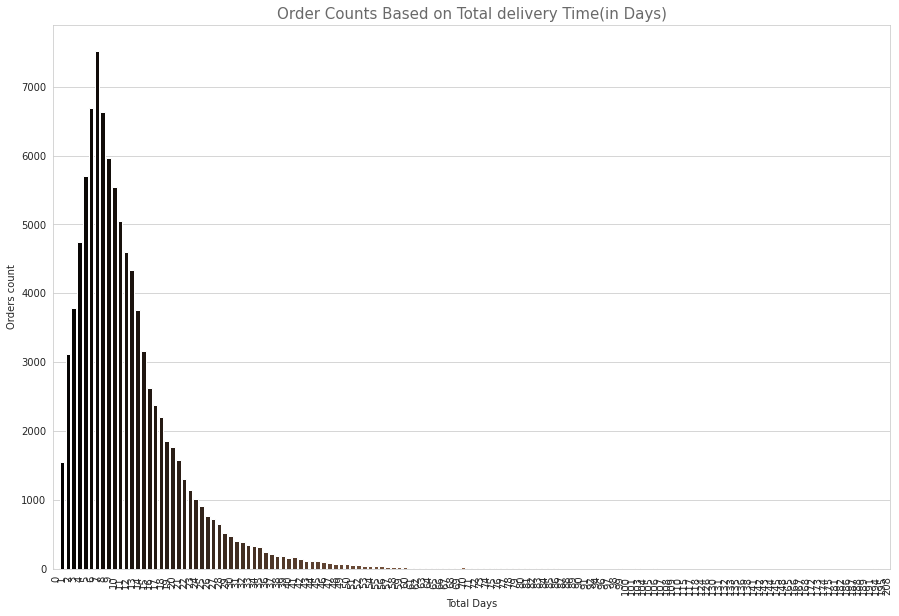

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Order Counts Based on Total delivery Time(in Days)",color='dimgrey',size=15)
g=sns.countplot(data=df_dev, x='day_to_delivery',palette='copper')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel('Total Days')
g.set_ylabel('Orders count')
plt.show()

**Univariate Analysis on Numerical Features**

<Figure size 1080x720 with 0 Axes>

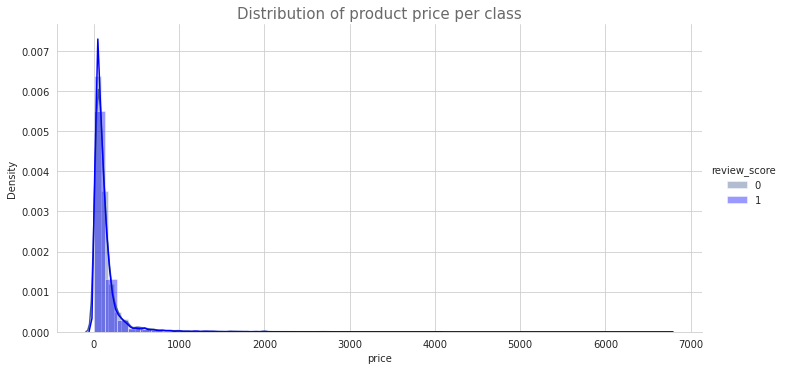

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
ax=sns.FacetGrid(df, hue='review_score',height=5,aspect=2,palette=['#425a90','blue'])
ax.map(sns.distplot, 'price').add_legend()
plt.title('Distribution of product price per class',size=15,color='dimgrey')
plt.show()


<Figure size 432x288 with 0 Axes>

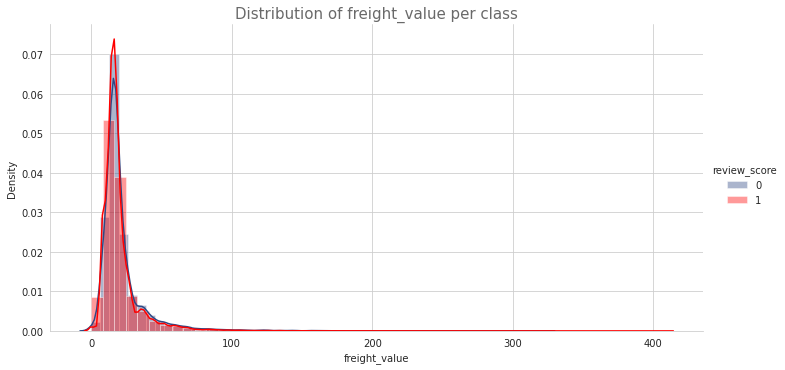

In [ ]:
plt.figure()
sns.set_style('whitegrid')
ax=sns.FacetGrid(df, hue='review_score', height=5, aspect=2, palette=['#2e4884','red'])
ax.map(sns.distplot,'freight_value').add_legend()
plt.title('Distribution of freight_value per class',size=15,color='dimgrey')
plt.show()

<Figure size 432x288 with 0 Axes>

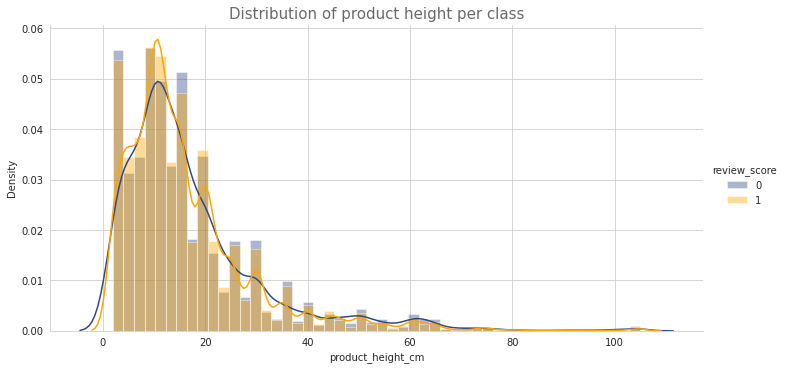

In [ ]:
plt.figure()
sns.set_style('whitegrid')
ax=sns.FacetGrid(df,hue='review_score',height=5,aspect=2,palette=['#2e4884','orange'])
ax.map(sns.distplot,'product_height_cm').add_legend()
plt.title('Distribution of product height per class',size=15,color='dimgrey')
plt.show()

<Figure size 432x288 with 0 Axes>

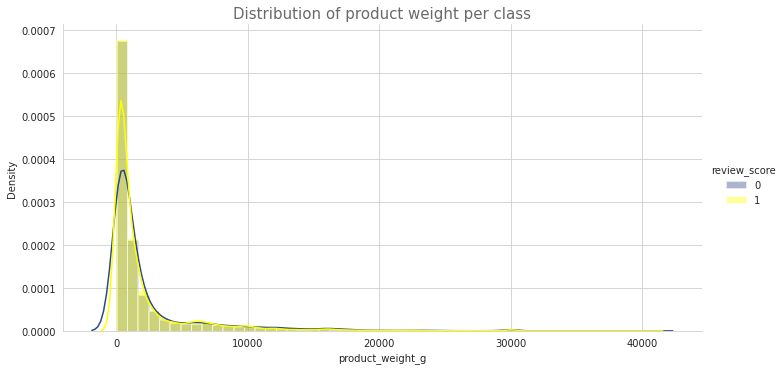

In [ ]:
plt.figure()
sns.set_style('whitegrid')
ax=sns.FacetGrid(df, hue='review_score',height=5,aspect=2, palette=['#2e4884','yellow'])
ax.map(sns.distplot,'product_weight_g').add_legend()
plt.title('Distribution of product weight per class',size=15,color='dimgrey')
plt.show()

<Figure size 432x288 with 0 Axes>

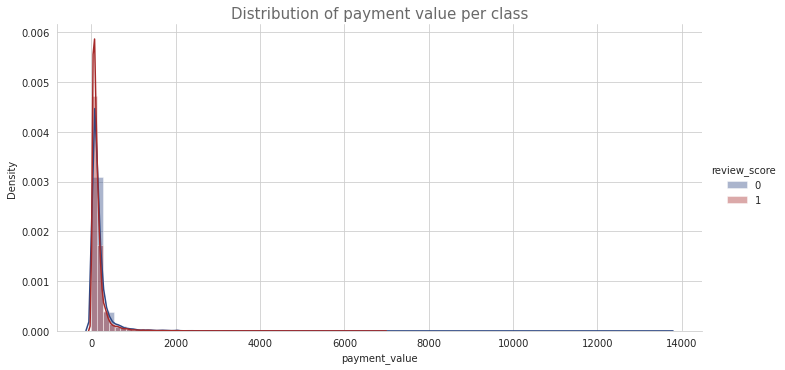

In [ ]:
plt.figure()
ax=sns.FacetGrid(df,hue='review_score',height=5,aspect=2,palette=['#2e4884','brown'])
ax.map(sns.distplot, 'payment_value').add_legend()
plt.title('Distribution of payment value per class',size=15,color='dimgrey')
plt.show()

**Box Plot**

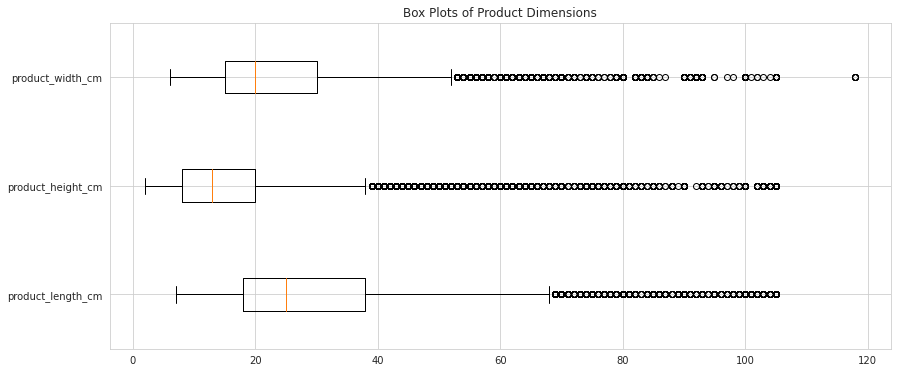

In [ ]:
plt.figure(figsize=(14,6))
box_plot_data=[df.product_length_cm,df.product_height_cm,df.product_width_cm]
plt.boxplot(box_plot_data,labels=['product_length_cm','product_height_cm','product_width_cm'],vert=False)
plt.title("Box Plots of Product Dimensions")
plt.show()

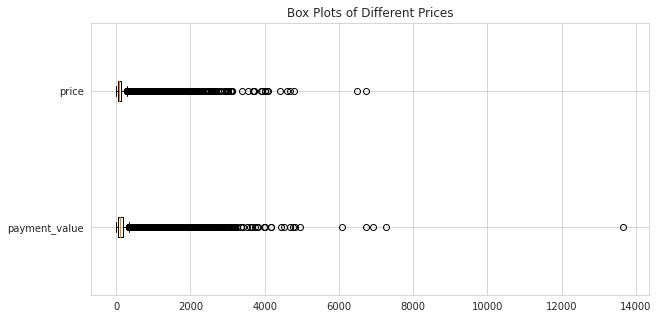

In [ ]:
plt.figure(figsize=(10,5))
box_plot_data=[df.payment_value,df.price]
plt.boxplot(box_plot_data,labels=['payment_value','price'],vert=False)
plt.title('Box Plots of Different Prices')
plt.show()

**Bivariate Analysis**

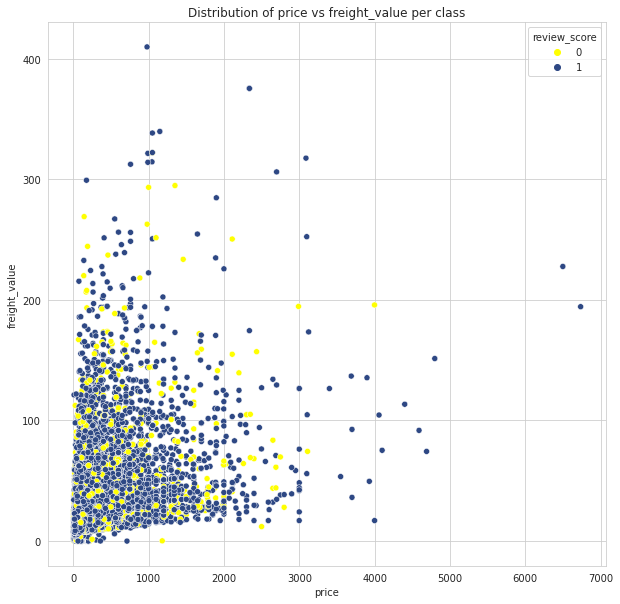

In [ ]:
# Distribution of price vs freight_value per class

plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.scatterplot(x='price',y='freight_value',data=df,palette=['yellow','#2e4884'],hue='review_score')
plt.title('Distribution of price vs freight_value per class')
plt.show()

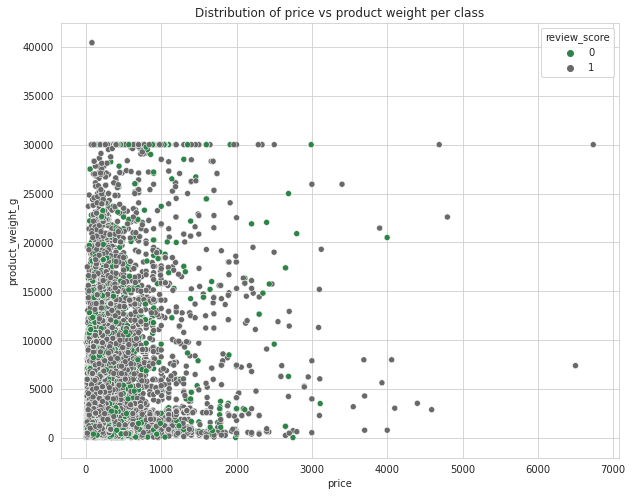

In [ ]:
# Distribution of price vs product_weight_g per class

plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
ax=sns.scatterplot(x='price',y='product_weight_g',hue='review_score',data=df,palette=['#2e8448','dimgrey'])
plt.title('Distribution of price vs product weight per class')
plt.show()

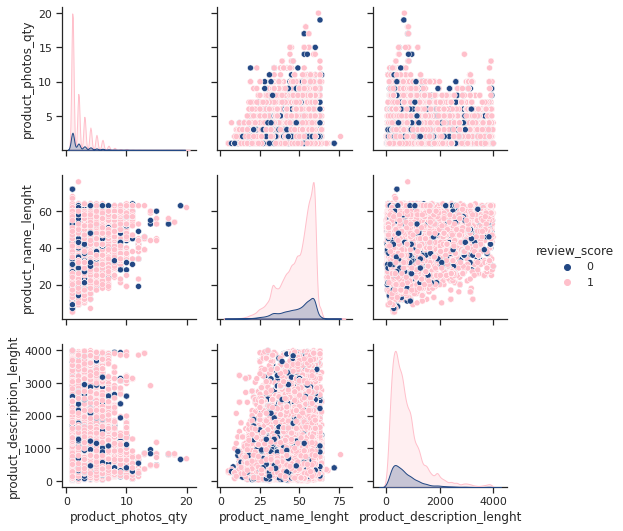

In [ ]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(df[['product_photos_qty','product_name_lenght','product_description_lenght','review_score']],hue='review_score',palette=['#234884','pink'])

**Multivariate Analysis**

In [ ]:
df_mm=df[['order_purchase_month_name','price']].groupby('order_purchase_month_name').sum()
df_mm

,price
order_purchase_month_name,
Apr,1220808.32
Aug,1295710.38
Dec,666699.82
Feb,973912.52
Jan,944793.18
Jul,1248562.24
Jun,1183381.57
Mar,1211684.97
May,1335529.22


In [ ]:
pi=list(df_mm['price'])
li=list(df_mm.index)
res={li[i]:pi[i] for i in range(len(li))}
res

{'Apr': 1220808.32,
 'Aug': 1295710.3800000001,
 'Dec': 666699.82,
 'Feb': 973912.52,
 'Jan': 944793.18,
 'Jul': 1248562.24,
 'Jun': 1183381.57,
 'Mar': 1211684.97,
 'May': 1335529.22,
 'Nov': 885910.42,
 'Oct': 621872.32,
 'Sep': 550710.13}

In [ ]:
from collections import OrderedDict
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weeks=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
res=dict(OrderedDict(sorted(res.items(),key=lambda x: months.index(x[0]))))
print(res)

{'Jan': 944793.18, 'Feb': 973912.52, 'Mar': 1211684.97, 'Apr': 1220808.32, 'May': 1335529.22, 'Jun': 1183381.57, 'Jul': 1248562.24, 'Aug': 1295710.3800000001, 'Sep': 550710.13, 'Oct': 621872.32, 'Nov': 885910.42, 'Dec': 666699.82}


In [ ]:
temp_3=pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

temp_3['total']=list(pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg([('total','count'),('avg','mean')]))['total'])
temp_3['avg']=list(pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg([('total','count'),('avg','mean')]))['avg'])

temp_3.sort_values(by=['total'],ascending=True)

,order_purchase_month_name,review_score,total,avg
11,Sep,3664,4152,0.882466
10,Oct,4154,4777,0.869583
2,Dec,4594,5435,0.845262
9,Nov,5975,7284,0.820291
4,Jan,6601,7743,0.852512
3,Feb,6613,8201,0.806365
0,Apr,7891,9119,0.865336
6,Jun,8222,9250,0.888865
7,Mar,7646,9575,0.798538
5,Jul,8961,10066,0.890225


In [ ]:
rem={list(temp_3.order_purchase_month_name)[i]:list(temp_3.total)[i] for i in range(len(temp_3))}
rem=dict(OrderedDict(sorted(rem.items(),key=lambda x:months.index(x[0]))))
print(rem)

{'Jan': 7743, 'Feb': 8201, 'Mar': 9575, 'Apr': 9119, 'May': 10325, 'Jun': 9250, 'Jul': 10066, 'Aug': 10589, 'Sep': 4152, 'Oct': 4777, 'Nov': 7284, 'Dec': 5435}


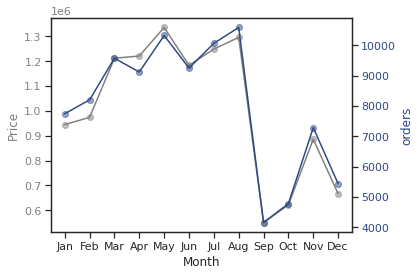

In [ ]:
fig,ax1=plt.subplots()

color='grey'
ax1.set_xlabel('Month')
ax1.set_ylabel('Price',color=color)
ax1.plot(list(res.keys()),list(res.values()),color=color)
ax1.plot(list(res.keys()),list(res.values()),'C0o',alpha=0.5,color='grey',)
ax1.tick_params(axis= 'y',labelcolor=color)

ax2=ax1.twinx()

color='#2e4884'
ax2.set_ylabel('orders',color=color)
ax2.plot(list(res.keys()),list(rem.values()),color=color)
ax2.plot(list(res.keys()),list(rem.values()),'C0o',alpha=0.5,color='#2e4884')
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.show()

datadatadf[dfdf**Text Analysis**

In [ ]:
review_df=pd.read_csv('/content/olist_order_reviews_dataset.csv')
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
review_df.shape

(99224, 7)

In [ ]:
review_data_title=review_df['review_comment_title']
review_data=review_df.drop('review_comment_title',axis=1)

In [ ]:
review_data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
#Dropping NAN values

review_data_title=review_data_title.dropna()
review_data=review_data.dropna()

In [ ]:
review_data_title.shape

(11568,)

In [ ]:
review_data_title.isnull().sum()

0

In [ ]:
review_data.shape

(40977, 6)

In [ ]:
review_data.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [ ]:
# Resetting the reviews index and visualizing the data

review_data=review_data.reset_index(drop=True)
review_data.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01


In [ ]:
review_data.shape

(40977, 6)

In [ ]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
comments=[]

stop_words=set(stopwords.words('portuguese'))

for words in review_data['review_comment_message']:
  only_letters=re.sub('[^a-zA-Z]','',words)
  tokens=nltk.word_tokenize(only_letters)
  lower_case=[l.lower() for l in tokens]
  filtered_result=list(filter(lambda l:l not in stop_words,lower_case))
  comments.append(''.join(filtered_result))

In [ ]:
comments

['recebibemantesdoprazoestipulado',
 'parabnslojaslannisteradoreicomprarpelainternetseguroeprticoparabnsatodosfelizpscoa',
 'aparelhoeficientenositeamarcadoaparelhoestaimpressocomodesinfectoreaochegarestacomoutronomeatualizarcomamarcacorretaumavezqueomesmoaparelho',
 'masumpoucotravandopelovalortaboa',
 'vendedorconfivelprodutookeentregaantesdoprazo',
 'gostariadesaberoquehouvesemprerecebieessacompraagoramedecpcionou',
 'pssimo',
 'lojanota',
 'obrigadopelaatenaoamimdispensada',
 'acomprafoirealizadafacilmenteaentregafoiefetuadamuitoantesdoprazodadooprodutojcomeouaserusadoeatopresentesemproblemas',
 'relgiomuitobonitoebarato',
 'nogosteicompreigatoporlebre',
 'semprecompropelainterneteaentregaocorreantesdoprazocombinadoqueacreditoseroprazomximonostarkoprazomximojseesgotoueaindanorecebioproduto',
 'recebiexatamenteoqueesperavaasdemaisencomendasdeoutrosvendedoresatrasarammasestachegounoprazo',
 'recomendo',
 'muitoboa',
 'tcompletamenteapaixonadalojasuperresponsveleconfivel',
 'nadadeche

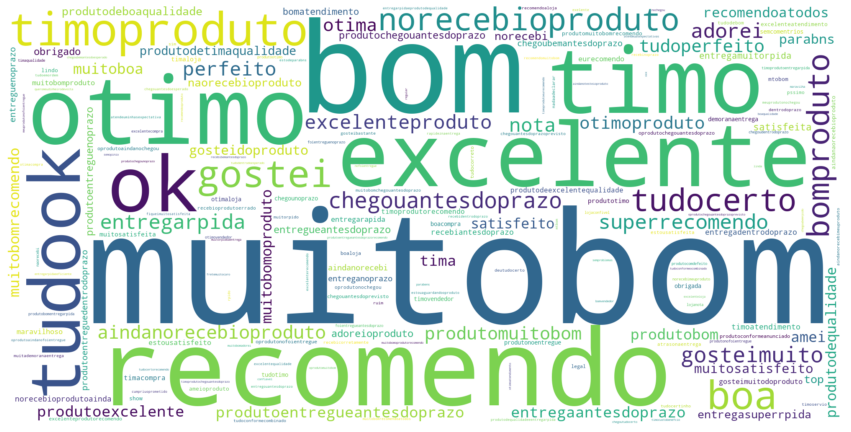

In [ ]:
from wordcloud import WordCloud

#Using wordcloud to visualize the comments
unique_strings=(" ").join(comments)
wordcloud=WordCloud(width=2000,height=1000,background_color='white').generate(unique_strings)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#further checking by Counting the words

from collections import Counter
words=(" ".join(review_data['review_comment_message'])).lower().split()
counts=Counter(words)

In [ ]:
print('Most frequent words')
sorted(counts.items(),key=lambda x:x[1],reverse=True)[:15]

Most frequent words


[('o', 18676),
 ('e', 15582),
 ('produto', 15462),
 ('a', 12133),
 ('de', 11296),
 ('do', 11139),
 ('não', 10614),
 ('que', 8271),
 ('muito', 7568),
 ('com', 5574),
 ('antes', 5533),
 ('entrega', 5363),
 ('chegou', 5130),
 ('prazo', 5043),
 ('no', 5038)]

In [ ]:
print('Least frequent words')
sorted(counts.items(),key=lambda x:x[1],reverse=False)[:15]

Least frequent words


[('3desinfector', 1),
 ('nome...atualizar', 1),
 (',travando...pelo', 1),
 ('decpcionou', 1),
 ('amim', 1),
 ('dispensada', 1),
 ('atrasaram,', 1),
 ('apaixonada,', 1),
 ('tomara', 1),
 ('pelinho.', 1),
 ('midea', 1),
 ('split', 1),
 ('estilo.', 1),
 ('parceria:', 1),
 ('rápidíssima,', 1)]

In [ ]:
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 8.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=4a45e49749d351c00cc351ad3aa5810d0d5a662d651e31e7773769cb12edac7d
  Stored in directory: /root/.cache/pip/wheels/dd/59/af/8d6c96a719763990f1c548e36b17d9efdfb767f42f7ff39f53
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
 

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c59774862acc8b95210ac5d8edce4d60c149f1a21b1e026a1b503e99a8788c22
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
#  google translate(from portuguese to english)


from langdetect import detect
from googletrans import Translator

def detect_and_translate(text,target_lang):

  result_lang=detect(text)

  if result_lang==target_lang:
    return text

  else:
    translator=Translator()
    translate_text=translator.translate(text, src=result_lang, dest=target_lang)
    return translate_text



In [ ]:
sentence="o,e,produto,a"
print(detect_and_translate(sentence,target_lang='en'))

Translated(src=pt, dest=en, text=the, and, product, the, pronunciation=the, and, product, the, extra_data="{'translat...")


In [ ]:
sentence="Pode-se pagar com cartão de crédito?"
print(detect_and_translate(sentence,target_lang='hi'))

Translated(src=pt, dest=hi, text=क्या आप क्रेडिट कार्ड से भुगतान कर सकते हैं?, pronunciation=kya aap kredit kaard se bhugataan kar sakate hain?, extra_data="{'translat...")


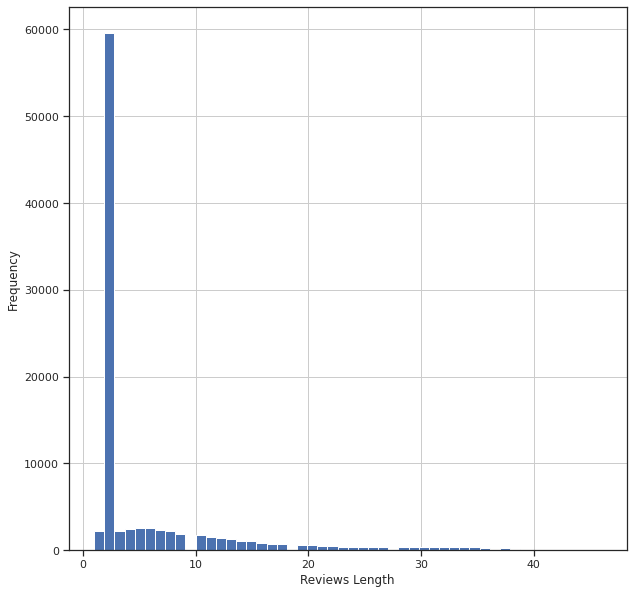

In [ ]:
# Getting the number of words by splitting them by a space

plt.figure(figsize=(10,10))
df['words_per_review']=df.review_comment_message.apply(lambda x:len(x.split(" ")))
df['words_per_review'].hist(bins=50)
plt.xlabel('Reviews Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**`RFM -Analysis`**

What is RFM?

Behavioral segmentation by 3 important features:

Recency — number of days since the last purchase

Frequency — number of transactions made over a given period

Monetary — amount spent over a given period of time

In [ ]:
from datetime import datetime

present=datetime(2022,11,24)
rfm=df.groupby('customer_unique_id').agg({'order_purchase_timestamp':lambda date :(present-date.max()).days,
                                          'order_id': lambda num: len(num),
                                          'payment_value':lambda price: price.sum()})

rfm.columns=['recency','frequency','monetary']
rfm['recency']=rfm['recency'].astype(int)
rfm['frequency']=rfm['frequency'].astype(int)
rfm['monetary']=rfm['monetary'].astype(float)


In [ ]:
rfm.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1658,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1661,1,27.19
0000f46a3911fa3c0805444483337064,2084,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1868,1,43.62
0004aac84e0df4da2b147fca70cf8255,1835,1,196.89


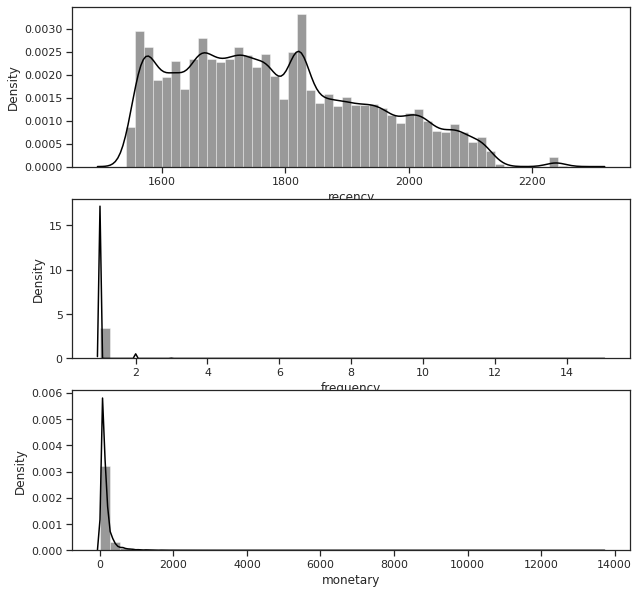

In [ ]:
# Plot RFM distributions

plt.figure(figsize=(10,10))

#plot distribution of R
plt.subplot(3,1,1);sns.distplot(rfm['recency'],color='black')

#plot distribution of F
plt.subplot(3,1,2);sns.distplot(rfm['frequency'],color='black')

#plot distribution of M
plt.subplot(3,1,3);sns.distplot(rfm['monetary'],color='black')

plt.show()

In [ ]:
def partition(x):
  if x<10:
    return 1
  elif 10<=x<=35:
    return 2
  elif 35<=x<=50:
    return 3
  elif 50<=x<=75:
    return 4

rfm['f_quartile']=rfm['frequency'].map(lambda cw:partition(cw))
rfm.f_quartile.value_counts()

r_labels=range(4,0,-1); m_labels=range(1,5)

rfm['r_quartile']=pd.qcut(rfm['recency'],4,r_labels)
rfm['m_quartile']=pd.qcut(rfm['monetary'],4,m_labels)

In [ ]:
rfm['rfm_score']=rfm.r_quartile.astype(str)+rfm.f_quartile.astype(str)+rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,rfm_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1658,1,141.90,1,4,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,1661,1,27.19,1,4,1,411
0000f46a3911fa3c0805444483337064,2084,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,1868,1,43.62,1,2,1,211
0004aac84e0df4da2b147fca70cf8255,1835,1,196.89,1,2,4,214


In [ ]:
rfm_count_unique=rfm.groupby('rfm_score')['rfm_score'].nunique()
rfm_count_unique.sum()

17

In [ ]:
rfm['rfm_score_s']=rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
rfm['rfm_score_s'].head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    8
0000b849f77a49e4a4ce2b2a4ca5be3f    6
0000f46a3911fa3c0805444483337064    4
0000f6ccb0745a6a4b88665a16c9f078    4
0004aac84e0df4da2b147fca70cf8255    7
Name: rfm_score_s, dtype: int64

In [ ]:
# Define rfm_level function

def rfm_level(df):
  if df['rfm_score_s']>=9:
    return "Cant loose them"
  elif ((df['rfm_score_s']>=8) and (df['rfm_score_s']<9)):
    return "Champions"
  elif ((df['rfm_score_s']>=7) and (df['rfm_score_s']<8)):
    return "Loyal"
  elif ((df['rfm_score_s']>=6) and (df['rfm_score_s']<7)):
    return "Potential"
  elif ((df['rfm_score_s']>=5) and (df['rfm_score_s']<6)):
    return "Promising"
  elif ((df['rfm_score_s']>=4) and (df['rfm_score_s']<5)):
    return "Needs Attention"
  else:
    return "Require Activation"

rfm['RFM_level']=rfm.apply(rfm_level,axis=1)

rfm.head()




,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,rfm_score,rfm_score_s,RFM_level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1658,1,141.90,1,4,3,413,8,Champions
0000b849f77a49e4a4ce2b2a4ca5be3f,1661,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,2084,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,1868,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,1835,1,196.89,1,2,4,214,7,Loyal


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 

rfm_level_agg=rfm.groupby('RFM_level').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean','count']
}).round(1)

print(rfm_level_agg)
rfm_level_agg.columns=rfm_level_agg.columns.droplevel()




                   recency frequency monetary       
                      mean      mean     mean  count
RFM_level                                           
Cant loose them     1605.4       1.1    400.0   6021
Champions           1657.8       1.1    257.0  11974
Loyal               1714.0       1.0    202.0  17347
Needs Attention     1911.1       1.0     62.1  11740
Potential           1784.9       1.0    164.7  22927
Promising           1843.5       1.0     86.2  17378
Require Activation  2002.7       1.0     41.2   6009


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


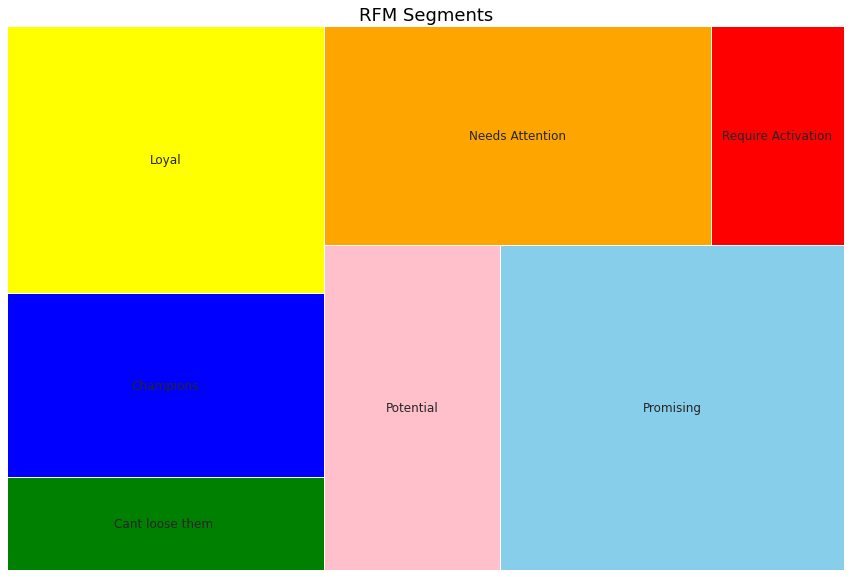

In [ ]:
import squarify

plt.figure(figsize=(15,10))
rfm_level_agg.columns=['RecencyMean','FrequencyMean','MonetaryMean','Count']

squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Cant loose them ',
                      'Champions','Loyal','Potential','Promising','Needs Attention','Require Activation'],color=['green','blue','yellow','pink','skyblue','orange','red'])
plt.title('RFM Segments',fontsize=18,color='black')
plt.axis('off')
plt.show()



In [ ]:
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,rfm_score,rfm_score_s,RFM_level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1658,1,141.90,1,4,3,413,8,Champions
0000b849f77a49e4a4ce2b2a4ca5be3f,1661,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,2084,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,1868,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,1835,1,196.89,1,2,4,214,7,Loyal


In [ ]:
rfm.to_pickle('rfm.pkl')
df.to_pickle('final.pkl')

In [ ]:
data=pd.read_pickle('final.pkl')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,day_to_delivery,words_per_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,201710,20171002,Oct-2017,2,0,Mon,10,Morning,8,32
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,201708,20170815,Aug-2017,15,1,Tue,18,Afternoon,2,16
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,201708,20170802,Aug-2017,2,2,Wed,18,Afternoon,5,12
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,...,201710,20171023,Oct-2017,23,0,Mon,23,Night,14,2
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,...,201711,20171124,Nov-2017,24,4,Fri,21,Night,33,22


**Preprocessing Review Text**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stopwords_pt=stopwords.words('portuguese')
print('Total portuguese words:',len(stopwords_pt))
print('Few portuguese words:',stopwords_pt[0:20])

Total portuguese words: 207
Few portuguese words: ['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele']


In [ ]:
stopwords_pt.remove('não')

In [ ]:
stopwords_pt.remove('nem')

In [ ]:
data['review_comment_message'].head(5)

0    Não testei o produto ainda, mas ele veio corre...
3    Deveriam embalar melhor o produto. A caixa vei...
4    Só achei ela pequena pra seis xícaras ,mais é ...
5                                            no review
6    Inicialmente, na data da compra o produto era ...
Name: review_comment_message, dtype: object

In [ ]:
from nltk.stem import RSLPStemmer
from tqdm import tqdm

In [ ]:
def preprocess_text(texts):
  hyperlinks='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+' #check for hyperlinks
  dates='([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}' #check for dates
  currency_symbols='[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+' #check for currency symbols
  preprocessed_text=[]
  stemmer=RSLPStemmer()  #portuguese nltk stemmer
  
  for sent in tqdm(texts):
    sent=re.sub(r"[\n\t\-\\\/]"," ",sent) #removing new lines, tabs
    sent=re.sub(hyperlinks,'url',sent) #replacing hyperlinks with url
    sent=re.sub(dates," ",sent) #removing dates
    sent=re.sub(currency_symbols,'dinheiro',sent) #replacing currency_symbols with 'dinheiro'
    sent=re.sub('[0-9]+','numero',sent) #removing digits
    sent=re.sub('([nN][ãÃaA][oO]|[ñÑ]| [nN] )',' negação ',sent) #replacing no. with negative
    sent=re.sub('\W','',sent) #removing extra white spaces
    sent=re.sub('\s+','',sent) #removing extra spaces
    sent=''.join(e for e in sent.split() if e.lower() not in stopwords_pt) #removing stopwords
    sent=''.join(stemmer.stem(e.lower()) for e in sent.split()) #stemming the stopwords
    preprocessed_text.append(sent.lower().strip())

  return preprocessed_text

In [ ]:
processed_text=preprocess_text(data['review_comment_message'].values)

100%|██████████| 96516/96516 [00:06<00:00, 14694.78it/s]


In [ ]:
data['review_comment_message']=processed_text
data['review_comment_message'].head(5)

0    negaçãotesteioprodutoaindamaseleveiocorretoeem...
3    deveriamembalarmelhoroprodutoacaixaveiotodaama...
4      sóacheielapequenapraseisxícarasmaiséumbomprodut
5                                             noreview
6    inicialmentenadatadacompraoprodutoeraparaseren...
Name: review_comment_message, dtype: object

In [ ]:
col= ['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
  'customer_unique_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'order_purchase_month_name',
 'order_purchase_year_month',
 'order_purchase_date',
 'order_purchase_month_yr',
 'order_purchase_day',
 'order_purchase_dayofweek',
 'order_purchase_dayofweek_name',
 'order_purchase_hour',
 'order_purchase_time_day','customer_city','customer_zip_code_prefix','product_category_name']

In [ ]:
data.drop(columns=col, axis=1, inplace=True)

In [ ]:
data.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_state,price,freight_value,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,order_purchase_year,order_purchase_month,day_to_delivery,words_per_review
0,delivered,1,credit_card,1,18.12,SP,29.99,8.72,40.0,268.0,...,19.0,8.0,13.0,housewares,1,negaçãotesteioprodutoaindamaseleveiocorretoeem...,2017,10,8,32
3,delivered,1,credit_card,3,37.77,SP,29.99,7.78,40.0,268.0,...,19.0,8.0,13.0,housewares,1,deveriamembalarmelhoroprodutoacaixaveiotodaama...,2017,8,2,16
4,delivered,1,credit_card,1,37.77,SP,29.99,7.78,40.0,268.0,...,19.0,8.0,13.0,housewares,1,sóacheielapequenapraseisxícarasmaiséumbomprodut,2017,8,5,12
5,delivered,1,boleto,1,44.09,SC,29.99,14.10,40.0,268.0,...,19.0,8.0,13.0,housewares,1,noreview,2017,10,14,2
6,delivered,1,credit_card,10,356.12,SP,339.00,17.12,48.0,664.0,...,38.0,34.0,34.0,housewares,0,inicialmentenadatadacompraoprodutoeraparaseren...,2017,11,33,22


**Splitting data into Train and Test: Stratified Sampling**

In [ ]:
x=data.drop(['review_score'],axis=1)
y=data['review_score']
print("      x  ","     y   ")
print(x.shape, y.shape)
print('\n')
x.head(1)

      x        y   
(96516, 21) (96516,)




,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_state,price,freight_value,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_comment_message,order_purchase_year,order_purchase_month,day_to_delivery,words_per_review
0,delivered,1,credit_card,1,18.12,SP,29.99,8.72,40.0,268.0,...,500.0,19.0,8.0,13.0,housewares,negaçãotesteioprodutoaindamaseleveiocorretoeem...,2017,10,8,32


In [ ]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=25)

print("  x_train  "," y_train  ")
print(x_train.shape, y_train.shape)
print("-"*25)
print("  x_test  ","  y_test  ")
print(x_test.shape,y_test.shape)

  x_train    y_train  
(77212, 21) (77212,)
-------------------------
  x_test     y_test  
(19304, 21) (19304,)


**Encoding Categorical Features**


**Encoding Categorical Features: order_status**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect_os_tr=CountVectorizer(binary=True)
vect_os_tr.fit(x_train['order_status'].values)

# we use the fitted CountVectorizer to convert the text to vector

os_st_tr=vect_os_tr.transform(x_train['order_status'].values)
os_st_te=vect_os_tr.transform(x_test['order_status'].values)

name_os=vect_os_tr.get_feature_names()

print('After Vectorization')
print(os_st_tr.shape, y_train.shape)
print(os_st_tr.shape, y_test.shape)
print(name_os)

After Vectorization
(77212, 6) (77212,)
(77212, 6) (19304,)
['canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']


**Encoding Categorical Features: payment_type**

In [ ]:
vect_pay_tr=CountVectorizer(binary=True)
vect_pay_tr.fit(x_train['payment_type'].values)

pay_typ_tr=vect_pay_tr.transform(x_train['payment_type'].values)
pay_typ_te=vect_pay_tr.transform(x_test['payment_type'].values)

name_typ=vect_pay_tr.get_feature_names()

print('After Vectorization')
print(pay_typ_tr.shape, y_train.shape)
print(pay_typ_tr.shape, y_test.shape)
print(name_typ)

After Vectorization
(77212, 4) (77212,)
(77212, 4) (19304,)
['boleto', 'credit_card', 'debit_card', 'voucher']


**Encoding Categorical Features:product_category_name_english**





In [ ]:
vectorizer=CountVectorizer()
vectorizer.fit(x_train['product_category_name_english'].values)

prod_cat_tr=vectorizer.transform(x_train['product_category_name_english'].values)
prod_cat_te=vectorizer.transform(x_test['product_category_name_english'].values)

name_prod=vectorizer.get_feature_names()

print('After Vectorization')
print(prod_cat_tr.shape,y_train.shape)
print(prod_cat_tr.shape,y_test.shape)
print(name_prod)

After Vectorization
(77212, 71) (77212,)
(77212, 71) (19304,)
['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_

**Encoding Categorical Features: customer_state**


In [ ]:
vertorizer=CountVectorizer(binary=True)
vertorizer.fit(x_train['customer_state'].values)

state_tr=vertorizer.transform(x_train['customer_state'].values)
state_te=vertorizer.transform(x_test['customer_state'].values)

name_st=vertorizer.get_feature_names()

print('After Vectorization')
print(state_tr.shape, y_train.shape)
print(state_tr.shape,y_test.shape)
print(name_st)

After Vectorization
(77212, 27) (77212,)
(77212, 27) (19304,)
['ac', 'al', 'am', 'ap', 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mg', 'ms', 'mt', 'pa', 'pb', 'pe', 'pi', 'pr', 'rj', 'rn', 'ro', 'rr', 'rs', 'sc', 'se', 'sp', 'to']


**Featurization of text data**


In [ ]:
!pip install fastText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=4402214 sha256=a1bf32416a29b586c25c6ffd7f4f4143fbad78e9560f2a8c53b26abe1da76e0d
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fastText


In [ ]:
import fasttext.util
fasttext.util.download_model('pt',if_exists='ignore')

'cc.pt.300.bin'

In [ ]:
from gensim.models import FastText
ft_model=FastText.load_fasttext_format('/content/cc.pt.300.bin')

In [ ]:
ft_model.wv['melhor'].shape

(300,)

In [ ]:
ft_model.similar_by_vector('produt')

[('produts', 0.6906509399414062),
 ('produ', 0.6056191921234131),
 ('produtoa', 0.5977535843849182),
 ('produe', 0.57929527759552),
 ('produto', 0.5772074460983276),
 ('produtos', 0.5754655003547668),
 ('produtoo', 0.5647249221801758),
 ('protudo', 0.5558850765228271),
 ('produtoe', 0.5553520321846008),
 ('vend', 0.5546207427978516)]

In [ ]:
def tfidfWord2Vector(text,ft_words,tfdif_words,tf_values):
  tfidf_w2v_vectors=[]
  for sentence in tqdm(text):
    vector=np.zeros(300)
    tf_idf_weight=0
    for word in sentence.split():
      if (word in ft_words) and (word in tfdif_words):
        vec=ft_model.wv[word]
        tf_idf=tf_values[word]*(sentence.count(word)/len(sentence.split()))
        vector=vector+(vec*tf_idf)
        tf_idf_weight=tf_idf_weight+tf_idf

    if tf_idf_weight!=0:
        vector=vector/tf_idf_weight
    tfidf_w2v_vectors.append(vector)
  
  tfidf_w2v_vectors=np.array(tfidf_w2v_vectors)

  return tfidf_w2v_vectors


In [ ]:
# encoding review comment message using Tfidf weighted W2V
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
tfidf.fit(x_train['review_comment_message'])

tf_values=dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
tfidf_words=set(tfidf.get_feature_names())
ft_words=list(ft_model.wv.vocab.keys())

tfidf_w2v_vectors_train=tfidfWord2Vector(x_train['review_comment_message'].values,ft_words,tfidf_words,tf_values)
tfidf_w2v_vectors_test=tfidfWord2Vector(x_test['review_comment_message'].values,ft_words,tfidf_words,tf_values)


100%|██████████| 19304/19304 [13:51<00:00, 23.21it/s]


In [ ]:
import pickle 
pickle.dump(tfidf_w2v_vectors_train,open('tfidf_w2v_vectors_train_1.pkl','wb'))
pickle.dump(tfidf_w2v_vectors_test,open('tfidf_w2v_vectors_test_1.pkl','wb'))

In [ ]:
tfidf_w2v_vectors_train=pickle.load(open('tfidf_w2v_vectors_train_1.pkl','rb'))
tfidf_w2v_vectors_test=pickle.load(open('tfidf_w2v_vectors_test_1.pkl','rb'))

**Numerical_features**


In [ ]:
from sklearn.preprocessing import Normalizer

def normalizer(col):
  normalizer=Normalizer()
  normalizer.fit(x_train[col].values.reshape(-1,1))
  x_train_norm=normalizer.transform(x_train[col].values.reshape(-1,1))
  x_test_norm=normalizer.transform(x_test[col].values.reshape(-1,1))
  return x_train_norm,x_test_norm

In [ ]:
#numerical features
num=['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'day_to_delivery']

In [ ]:
tr=[]
te=[]
for i in num:
  a,b=normalizer(i)
  tr.append(a)
  te.append(b)

In [ ]:
from scipy.sparse import hstack, csr_matrix
import numpy as np

x_tr_num=np.hstack((tr))
x_te_num=np.hstack((te))

print('Final Data Matrix')
print(x_tr_num.shape,y_train.shape)
print(x_te_num.shape,y_test.shape)

Final Data Matrix
(77212, 13) (77212,)
(19304, 13) (19304,)


In [ ]:
from scipy.sparse import hstack

x_tr=hstack((tfidf_w2v_vectors_train,os_st_tr,pay_typ_tr,prod_cat_tr,state_tr,x_tr_num)).tocsr()
x_te=hstack((tfidf_w2v_vectors_test,os_st_te,pay_typ_te,prod_cat_te,state_te,x_te_num)).tocsr()

print('Final Data Matrix')
print(x_tr.shape, y_train.shape)
print(x_te.shape,y_test.shape)

Final Data Matrix
(77212, 421) (77212,)
(19304, 421) (19304,)


**Random Model**


In [ ]:
from sklearn.metrics import confusion_matrix

def confusion_metrices_plot(y_real,y_pred,y_test,y_test_pred,name):
  cmap=sns.light_palette("#425a90",as_cmap=True)
  cmap_=sns.light_palette("#000000", as_cmap=True)
  c1=confusion_matrix(y_real,y_pred)
  c2=confusion_matrix(y_test,y_test_pred)

  fig,ax=plt.subplots(1,2,figsize=(15,5))
  ax1=sns.heatmap(c1,cmap=cmap,annot=True,fmt=".2f",ax=ax[0])
  ax1.set_xlabel('Predicted Class')
  ax1.set_ylabel('Original Class')
  ax1.set_title('Train Confusion Matrix')

  ax2=sns.heatmap(c2,cmap=cmap_,annot=True,fmt=".2f",ax=ax[1])
  ax2.set_xlabel('Predicted Class')
  ax2.set_ylabel('Orgiginal Class')
  ax2.set_title('Test Confusion Matrix')

  plt.show()

Train F1 Score: 0.4240242426483174
Test F1 score: 0.4273372029795029


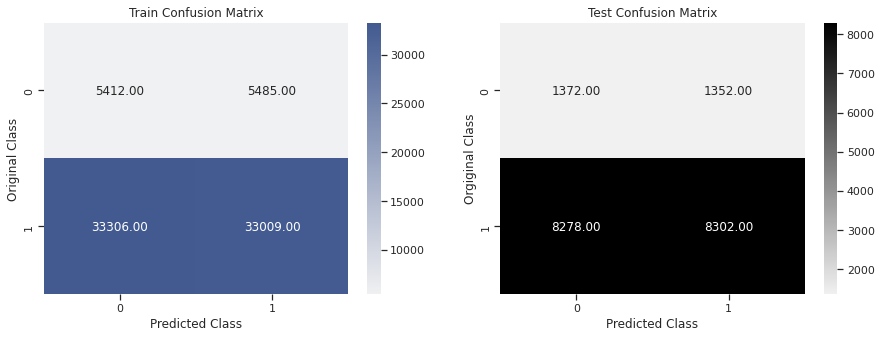

In [ ]:
import random
from sklearn.metrics import f1_score
train_data_len=x_tr.shape[0]
test_data_len=x_te.shape[0]

y_train_pred=np.zeros((train_data_len,1))
for i in range(train_data_len):
  rand_c=random.randint(0,1)
  y_train_pred[i]=(rand_c)
print('Train F1 Score:',f1_score(y_train,y_train_pred,average='macro'))
y_test_pred=np.zeros((test_data_len,1))
for i in range(test_data_len):
  rand_c=random.randint(0,1)
  y_test_pred[i]=(rand_c)
print('Test F1 score:',f1_score(y_test,y_test_pred,average='macro'))

confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'bs_rn.png')

**Naive Bayes Model**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(x_tr.todense())
x_tr=scaler.transform(x_tr.todense())

In [ ]:
scaler.fit(x_te.todense())
x_te=scaler.transform(x_te.todense())

Alpha: 1e-05 Train Score: 0.5582331438693782 Test Score 0.5612086305582203
Alpha: 0.0001 Train Score: 0.5582331438693782 Test Score 0.5612086305582203
Alpha: 0.001 Train Score: 0.5582331438693782 Test Score 0.5612086305582203
Alpha: 0.01 Train Score: 0.5582236340373532 Test Score 0.5611702770174603
Alpha: 0.1 Train Score: 0.5581760881961799 Test Score 0.5611319266619954
Alpha: 1 Train Score: 0.5572253491438575 Test Score 0.5600952419454269
Alpha: 10 Train Score: 0.5532740915424887 Test Score 0.5576779390229955
Alpha: 100 Train Score: 0.5626477539417619 Test Score 0.5652601817492457
Alpha: 1000 Train Score: 0.462038501466623 Test Score 0.46202937324081034


Text(0.5, 1.0, 'Alpha Vs Score')

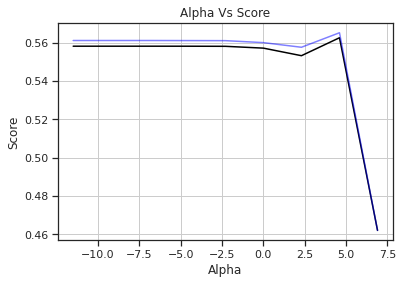

In [ ]:
# Training Logistic regression model and chekcing f1 score metric

from sklearn.naive_bayes import MultinomialNB
alpha=[10**x for x in range(-5,4)]
train_scores=[]
test_scores=[]

for i in alpha:
  nb_cfl=MultinomialNB(alpha=i,fit_prior=False)
  nb_cfl.fit(x_tr,y_train)
  train_sc=f1_score(y_train,nb_cfl.predict(x_tr),average='macro')
  test_sc=f1_score(y_test,nb_cfl.predict(x_te),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Alpha:',i,'Train Score:',train_sc,'Test Score',test_sc)

plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',alpha=0.5,color='blue')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha Vs Score')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf=MultinomialNB(class_prior=np.array([0.5,0.5]),fit_prior=False)
params={'alpha':[10**x for x in range(-5,4)]}

nb_cfl=RandomizedSearchCV(clf,param_distributions=params,n_jobs=-1,verbose=10,scoring='f1_macro',random_state=25,return_train_score=True)
nb_cfl.fit(x_tr,y_train)
print('mean train scores:',nb_cfl.cv_results_['mean_train_score'])
print('mean test scores:',nb_cfl.cv_results_['mean_test_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
mean train scores: [0.55709741 0.55709741 0.55709741 0.55708558 0.5569758  0.55643233
 0.55304505 0.56400783 0.4620385 ]
mean test scores: [0.55334819 0.55334819 0.55334819 0.55336031 0.55331777 0.55314104
 0.54985864 0.56290892 0.4620385 ]


In [ ]:
print("Best Parameters:",nb_cfl.best_params_)
print("Best Score:",nb_cfl.best_score_)

Best Parameters: {'alpha': 100}
Best Score: 0.5629089188576376


In [ ]:
from sklearn.metrics import roc_curve, auc

clf=MultinomialNB(alpha=10,class_prior=np.array([0.5,0.5]),fit_prior=False)
clf.fit(x_tr,y_train)

y_train_pred=clf.predict(x_tr)
y_test_pred=clf.predict(x_te)

print("Train f1 score:",f1_score(y_train,y_train_pred,average='macro'))
print("Test f1 score:",f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.5532740915424887
Test f1 score: 0.5576779390229955


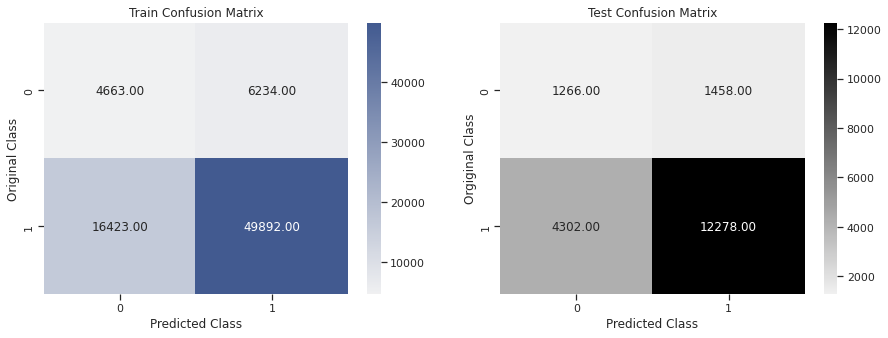

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'bs_nb.png')

**Logistic regression**

Alpha: 1e-05 Train Score 0.586230723912316 Test Score: 0.3245577971917125
Alpha: 0.0001 Train Score 0.5643297626101468 Test Score: 0.576524070523143
Alpha: 0.001 Train Score 0.5639008869556099 Test Score: 0.568612953218966
Alpha: 0.01 Train Score 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 0.1 Train Score 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 1 Train Score 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 10 Train Score 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 100 Train Score 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 1000 Train Score 0.12367635542339601 Test Score: 0.12366079535137099


Text(0.5, 1.0, 'Alpha Vs Score')

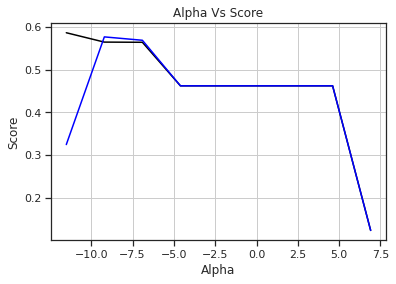

In [ ]:
from sklearn.linear_model import SGDClassifier
alpha=[10**x for x in range(-5,4)]
train_scores=[]
test_scores=[]

for i in alpha:
  lr=SGDClassifier(loss='log',penalty='l2',alpha=i,n_jobs=-1,random_state=25)
  lr.fit(x_tr,y_train)
  train_sc=f1_score(y_train,lr.predict(x_tr),average='macro')
  test_sc=f1_score(y_test,lr.predict(x_te),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print("Alpha:",i,"Train Score",train_sc,"Test Score:",test_sc)

plt.plot(np.log(alpha),train_scores,label="Train Score",color="black")
plt.plot(np.log(alpha),test_scores,label="Test Score",color="blue")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.grid()
plt.title("Alpha Vs Score")


In [ ]:
sgd=SGDClassifier(loss='log',n_jobs=-1,random_state=25)
params={'alpha':[10**x for x in range(-5,4)]}

random_cfl1=RandomizedSearchCV(sgd,param_distributions=params,verbose=10,n_jobs=-1,random_state=25,return_train_score=True)
random_cfl1.fit(x_tr,y_train)

print('Mean Train Score:',random_cfl1.cv_results_['mean_train_score'])
print('Mean Test Score:',random_cfl1.cv_results_['mean_test_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Train Score: [0.87050912 0.87042493 0.87038932 0.85886909 0.85886909 0.85886909
 0.85886909 0.85886909 0.85886909]
Mean Test Score: [0.870344   0.8704217  0.8703958  0.85886909 0.85886909 0.85886909
 0.85886909 0.85886909 0.85886909]


In [ ]:
print("Best parameters:",random_cfl1.best_params_)
print("Best Score:",random_cfl1.best_score_)

Best parameters: {'alpha': 0.0001}
Best Score: 0.8704217026884203


In [ ]:
sgd=SGDClassifier(loss='log',alpha=1e-05,n_jobs=-1,random_state=25)
sgd.fit(x_tr,y_train)

y_train_pred=sgd.predict(x_tr)
y_test_pred=sgd.predict(x_te)

print("Train f1 Score:",f1_score(y_train,y_train_pred,average='macro'))
print("Test f1 Score:",f1_score(y_test,y_test_pred,average='macro'))

Train f1 Score: 0.586230723912316
Test f1 Score: 0.3245577971917125


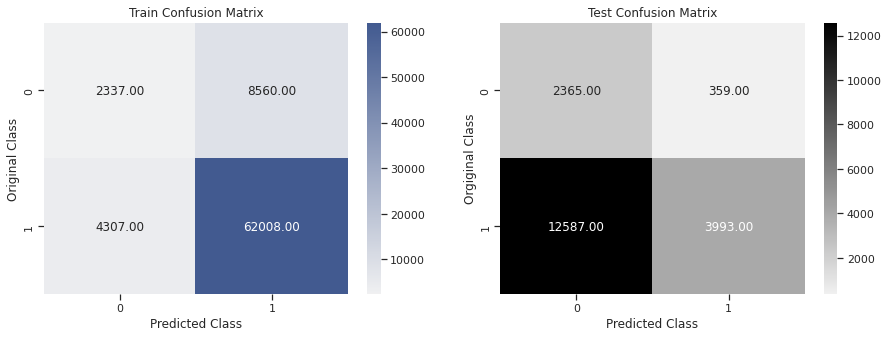

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'bs_lr.png')

In [ ]:
data_n=pd.read_pickle('final.pkl')
data_n.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,day_to_delivery,words_per_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,201710,20171002,Oct-2017,2,0,Mon,10,Morning,8,32
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,201708,20170815,Aug-2017,15,1,Tue,18,Afternoon,2,16
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,201708,20170802,Aug-2017,2,2,Wed,18,Afternoon,5,12
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,...,201710,20171023,Oct-2017,23,0,Mon,23,Night,14,2
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,...,201711,20171124,Nov-2017,24,4,Fri,21,Night,33,22


In [ ]:
data_n.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'order_purchase_month_yr', 'order_purchase_day',
       'order_purchase_dayofweek', 'order_purchase_da

In [ ]:
#sellers count for each product

fea_1=data_n.groupby('product_id').count()['seller_id']
fea_1_df=pd.DataFrame()
fea_1_df['product_id']=fea_1.index
fea_1_df['sellers_count']=fea_1.values
fea_1_df.head()

,product_id,sellers_count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1


In [ ]:
#sellers count for each product

fea_2=data_n.groupby('order_id').count()['product_id']
fea_2_df=pd.DataFrame()
fea_2_df['order_id']=fea_2.index
fea_2_df['products_count']=fea_2.values
fea_2_df.head()

,order_id,products_count
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


In [ ]:
# Adding the seller count and products count feature to the final data set

data_n=pd.merge(data_n,fea_1_df,on='product_id')
data_n=pd.merge(data_n,fea_2_df,on='order_id')

In [ ]:
data_n

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,day_to_delivery,words_per_review,sellers_count,products_count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,Oct-2017,2,0,Mon,10,Morning,8,32,4,1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,Aug-2017,15,1,Tue,18,Afternoon,2,16,4,1
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,Aug-2017,2,2,Wed,18,Afternoon,5,12,4,1
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,...,Oct-2017,23,0,Mon,23,Night,14,2,4,1
4,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,...,Nov-2017,24,4,Fri,21,Night,33,22,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96511,2cfc3681e512e0d12b6fe84b396e3907,6c60b00bcbef919c1697d18c309a99fe,delivered,2018-04-22 20:15:52,2018-04-24 18:46:28,2018-04-30 20:51:45,2018-05-18,1,credit_card,1,...,Apr-2018,22,6,Sun,20,Night,8,2,1,1
96512,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,delivered,2018-08-03 21:35:53,2018-08-04 04:25:14,2018-08-09 21:42:08,2018-08-10,1,boleto,1,...,Aug-2018,3,4,Fri,21,Night,6,2,1,1
96513,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-27 14:04:10,2018-08-06,1,credit_card,1,...,Jul-2018,23,0,Mon,18,Afternoon,3,27,1,1
96514,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-02-14 16:24:01,2017-03-07,1,credit_card,1,...,Jan-2017,26,3,Thu,11,Morning,19,4,1,1


In [ ]:
# calculating estimated delivery time

data_n['estimated_delivery_t']=(data_n['order_estimated_delivery_date']-data_n['order_approved_at']).dt.days

# calculating actual delivery time
data_n['actual_delivery_t']=(data_n['order_delivered_customer_date']-data_n['order_approved_at']).dt.days

# calculating diff_in_delivery_time
data_n['diff_in_delivery_t']=data_n['order_estimated_delivery_date']-data_n['order_delivered_customer_date']

data_n['on_time_delivery']=data_n['order_delivered_customer_date']<data_n['order_estimated_delivery_date']
data_n['on_time_delivery']=data_n['on_time_delivery'].astype('int')

# calculating mean product value
data_n['avg_prdt_value']=data_n['price']/data_n['products_count']

# finding total order cost
data_n['total_order_cost']=data_n['price']+data_n['freight_value']

# calculating order freight ratio
data_n['order_freight_ratio']=data_n['freight_value']/data_n['price']

# finding the day of week on which order was made
data_n['purchase_dayofweek']=pd.to_datetime(data_n['order_purchase_timestamp']).dt.dayofweek

# adding is_reviewed where 1 is if review comment is given otherwise 0.

data_n['is_reviewed']=(data_n['review_comment_message']!='no_review').astype('int')

In [ ]:
rfm=pd.read_pickle('rfm.pkl')
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,rfm_score,rfm_score_s,RFM_level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1658,1,141.90,1,4,3,413,8,Champions
0000b849f77a49e4a4ce2b2a4ca5be3f,1661,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,2084,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,1868,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,1835,1,196.89,1,2,4,214,7,Loyal


In [ ]:
data_n=data_n.merge(rfm,on='customer_unique_id',how='left')
data_n.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,...,is_reviewed,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,rfm_score,rfm_score_s,RFM_level
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,...,1,1878,2,62.23,1,2,2,212,5,Promising
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,...,1,1926,1,37.77,1,1,1,111,3,Require Activation
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,...,1,1939,1,37.77,1,1,1,111,3,Require Activation
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,...,1,1857,1,44.09,1,2,1,211,4,Needs Attention
4,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,...,1,1825,1,356.12,1,2,4,214,7,Loyal


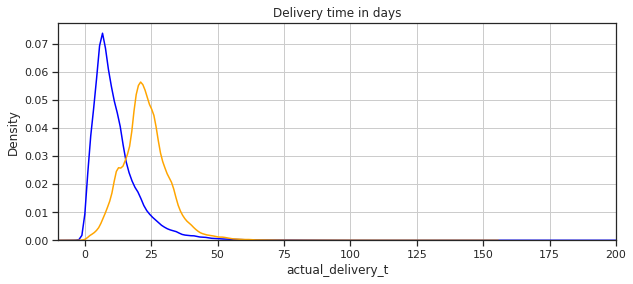

In [ ]:
# Delivery estimated time and actual delivery time

plt.figure(figsize=(10,4))

plt.title('Delivery time in days')
plt.xlim(-10,200)
plt.grid()

ax1=sns.kdeplot(data_n['actual_delivery_t'],color='blue',label='Delivery Time')
ax2=sns.kdeplot(data_n['estimated_delivery_t'],color='orange',label='Estimated Delivery Time')

In [ ]:
col= ['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
  'customer_unique_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
  'order_purchase_year',
 'order_purchase_month',
 'order_purchase_month_name',
 'order_purchase_year_month',
 'order_purchase_date',
 'order_purchase_month_yr',
 'order_purchase_day',
 'order_purchase_dayofweek',
 'order_purchase_dayofweek_name',
 'order_purchase_hour',
 'order_purchase_time_day',
  'f_quartile',
 'r_quartile',
 'm_quartile',
 'rfm_score',
 'rfm_score_s',
 'product_category_name']

In [ ]:
data_n.drop(columns=col,axis=1,inplace=True)
data_n.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,...,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_level
0,delivered,1,credit_card,1,18.12,3149,sao paulo,SP,29.99,8.72,...,1,29.99,38.71,0.290764,0,1,1878,2,62.23,Promising
1,delivered,1,credit_card,3,37.77,3366,sao paulo,SP,29.99,7.78,...,1,29.99,37.77,0.259420,1,1,1926,1,37.77,Require Activation
2,delivered,1,credit_card,1,37.77,2290,sao paulo,SP,29.99,7.78,...,1,29.99,37.77,0.259420,2,1,1939,1,37.77,Require Activation
3,delivered,1,boleto,1,44.09,88032,florianopolis,SC,29.99,14.10,...,1,29.99,44.09,0.470157,0,1,1857,1,44.09,Needs Attention
4,delivered,1,credit_card,10,356.12,19400,presidente venceslau,SP,339.00,17.12,...,0,339.00,356.12,0.050501,4,1,1825,1,356.12,Loyal


In [ ]:
#text processing

processed_text=preprocess_text(data_n['review_comment_message'].values)

100%|██████████| 96516/96516 [00:06<00:00, 14643.75it/s]


In [ ]:
data_n['review_comment_message']=processed_text
data_n['review_comment_message'].head()

0    negaçãotesteioprodutoaindamaseleveiocorretoeem...
1    deveriamembalarmelhoroprodutoacaixaveiotodaama...
2      sóacheielapequenapraseisxícarasmaiséumbomprodut
3                                             noreview
4    inicialmentenadatadacompraoprodutoeraparaseren...
Name: review_comment_message, dtype: object

In [ ]:
#Spliting data in Train and Test.

x=data_n.drop('review_score',axis=1)
y=data_n['review_score']

print("  x   ","   y   ")
print(x.shape,y.shape)

x.head(1)

  x       y   
(96516, 36) (96516,)


,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,...,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_level
0,delivered,1,credit_card,1,18.12,3149,sao paulo,SP,29.99,8.72,...,1,29.99,38.71,0.290764,0,1,1878,2,62.23,Promising


In [ ]:
# train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=25)

print("  x_train  ","  y_train  ")
print(x_train.shape,y_train.shape)
print("="*20)
print("  x_test  ","  y_test  ")
print(x_test.shape,y_test.shape)

  x_train     y_train  
(77212, 36) (77212,)
  x_test     y_test  
(19304, 36) (19304,)


In [ ]:
pickle.dump(x_train,open('x_train.pkl','wb'))
pickle.dump(x_test,open('x_test.pkl','wb'))
pickle.dump(y_train,open('y_train.pkl','wb'))
pickle.dump(y_test,open('y_test.pkl','wb'))

In [ ]:
x_train=pickle.load(open('x_train.pkl','rb'))
x_test=pickle.load(open('x_test.pkl','rb'))
y_train=pickle.load(open('y_train.pkl','rb'))
y_test=pickle.load(open('y_test.pkl','rb'))

**Featurization of text data**

In [ ]:
tfidf=TfidfVectorizer()
tfidf.fit(x_train['review_comment_message'])

tf_values=dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
tfidf_words=set(tfidf.get_feature_names())
glove_words=list(ft_model.wv.vocab.keys())

tfidf_w2v_vectors_train=tfidfWord2Vector(x_train['review_comment_message'].values,glove_words,tfidf_words,tf_values)
tfidf_w2v_vectors_test=tfidfWord2Vector(x_test['review_comment_message'].values,glove_words,tfidf_words,tf_values)

100%|██████████| 19304/19304 [13:18<00:00, 24.18it/s]


In [ ]:
tfidf_w2v_vectors_train.shape,tfidf_w2v_vectors_test.shape

((77212, 300), (19304, 300))

In [ ]:
pickle.dump(tfidf_w2v_vectors_train,open('tfidf_w2v_vectors_train.pkl','wb'))
pickle.dump(tfidf_w2v_vectors_test,open('tfidf_w2v_vectors_test.pkl','wb'))

**Encoding Categorical Features**


*Encoding Categorical Features: order_status*

In [ ]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train['order_status'].values)

order_st_tr=vectorizer.transform(x_train['order_status'].values)
order_st_te=vectorizer.transform(x_test['order_status'].values)

print('After Vectorization')
print(order_st_tr.shape,y_train.shape)
print(order_st_tr.shape,y_test.shape)

After Vectorization
(77212, 6) (77212,)
(77212, 6) (19304,)


*Encoding Categorical Features:payment_type*

In [ ]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train['payment_type'].values)

pay_typ_tr=vectorizer.transform(x_train['payment_type'].values)
pay_typ_te=vectorizer.transform(x_test['payment_type'].values)

print('After Vectorization')
print(pay_typ_tr.shape,y_train.shape)
print(pay_typ_tr.shape,y_test.shape)

After Vectorization
(77212, 4) (77212,)
(77212, 4) (19304,)


*EncodingCategoricalFeatures:product_category_name_english*

In [ ]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train['product_category_name_english'].values)

prod_cat_tr=vectorizer.transform(x_train['product_category_name_english'].values)
prod_cat_te=vectorizer.transform(x_test['product_category_name_english'].values)

print('After Vectorization')
print(prod_cat_tr.shape,y_train.shape)
print(prod_cat_te.shape,y_test.shape)


After Vectorization
(77212, 71) (77212,)
(19304, 71) (19304,)


*Encoding Categorical Features: customer_state*

In [ ]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train['customer_state'].values)

state_tr=vectorizer.transform(x_train['customer_state'].values)
state_te=vectorizer.transform(x_test['customer_state'].values)

print('After Vectorization')
print(state_tr.shape,y_train.shape)
print(state_te.shape,y_test.shape)

After Vectorization
(77212, 27) (77212,)
(19304, 27) (19304,)


*Encoding Categorical Features: RFM_Level*

In [ ]:
vectorizer=CountVectorizer(binary=True)
vectorizer.fit(x_train['RFM_level'].values)

rfm_tr=vectorizer.transform(x_train['RFM_level'].values)
rfm_te=vectorizer.transform(x_test['RFM_level'].values)

print('After Vectorization')
print(rfm_tr.shape,y_train.shape)
print(rfm_te.shape,y_test.shape)

After Vectorization
(77212, 11) (77212,)
(19304, 11) (19304,)


## Numerical features

In [ ]:
num=['payment_sequential',
 'payment_installments',
 'payment_value',
 'customer_zip_code_prefix',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'day_to_delivery',
 'recency',
 'frequency',
 'monetary',
 'sellers_count',
 'products_count',
 'estimated_delivery_t',
 'actual_delivery_t',
 'diff_in_delivery_t',
 'on_time_delivery',
 'avg_prdt_value',
 'total_order_cost',
 'order_freight_ratio',
 'purchase_dayofweek',
 'is_reviewed','words_per_review']

In [ ]:
tr=[]
te=[]

for i in num:
  a,b=normalizer(i)
  tr.append(a)
  te.append(b)


In [ ]:
from scipy.sparse import hstack,csr_matrix
import numpy as np

x_tr_num=np.hstack((tr))
x_te_num=np.hstack((te))

print('Final Data Matrix')
print(x_tr_num.shape,y_train.shape)
print(x_te_num.shape,y_test.shape)


Final Data Matrix
(77212, 29) (77212,)
(19304, 29) (19304,)


In [ ]:
from scipy.sparse import hstack

x_tr=hstack((tfidf_w2v_vectors_train,order_st_tr,pay_typ_tr,prod_cat_tr,state_tr,rfm_tr,x_tr_num)).tocsr()
x_te=hstack((tfidf_w2v_vectors_test,order_st_te,pay_typ_te,prod_cat_te,state_te,rfm_te,x_te_num)).tocsr()

print("Final Data Matrix")
print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)

Final Data Matrix
(77212, 448) (77212,)
(19304, 448) (19304,)


In [ ]:
pickle.dump(x_tr,open('x_tr.pkl','wb'))
pickle.dump(x_te,open('x_te.pkl','wb'))

In [ ]:
x_tr=pickle.load(open('x_tr.pkl','rb'))
x_te=pickle.load(open('x_te.pkl','rb'))

Alpha: 1e-05 Train Score: 0.5479420025476024 Test Score: 0.5510233249862981
Alpha: 0.0001 Train Score: 0.6729082015777624 Test Score: 0.6768261609775882
Alpha: 0.001 Train Score: 0.6642344122940367 Test Score: 0.6727244431607178
Alpha: 0.01 Train Score: 0.686441049519946 Test Score: 0.6918022650428413
Alpha: 0.1 Train Score: 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 1 Train Score: 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 10 Train Score: 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 100 Train Score: 0.462038501466623 Test Score: 0.4620443651766804
Alpha: 1000 Train Score: 0.462038501466623 Test Score: 0.4620443651766804


Text(0.5, 1.0, 'Alpha Vs Score')

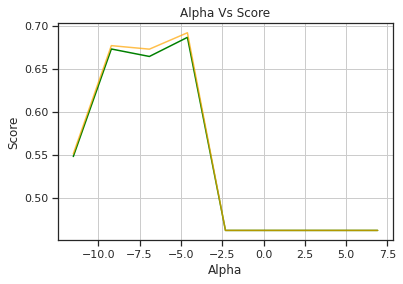

In [ ]:
# Training Logistic regression model and chekcing f1 score metric

alpha=[10**x for x in range(-5,4)]
train_scores=[]
test_scores=[]

for i in alpha:
  lr=SGDClassifier(loss='log',penalty='l2',alpha=i,n_jobs=-1,random_state=25)
  lr.fit(x_tr,y_train)
  train_sc=f1_score(y_train,lr.predict(x_tr),average='macro')
  test_sc=f1_score(y_test,lr.predict(x_te),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Alpha:',i,'Train Score:',train_sc,'Test Score:',test_sc)

plt.plot(np.log(alpha),train_scores,label='Train Score',color='green')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='orange',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha Vs Score')

In [ ]:
sgd=SGDClassifier(loss='log',n_jobs=-1,random_state=25)
params={'alpha':[10**x for x in range(-5,4)]}

random_cfl1=RandomizedSearchCV(sgd,param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,return_train_score=True)
random_cfl1.fit(x_tr,y_train)

print('mean train scores:',random_cfl1.cv_results_['mean_train_score'])
print('mean test scores:',random_cfl1.cv_results_['mean_test_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
mean train scores: [0.66330902 0.70681672 0.65334342 0.67290453 0.4620385  0.4620385
 0.4620385  0.4620385  0.4620385 ]
mean test scores: [0.66035755 0.70658682 0.65556366 0.6715616  0.4620385  0.4620385
 0.4620385  0.4620385  0.4620385 ]


In [ ]:
print("Best Parameters:",random_cfl1.best_params_)
print("Best Score:",random_cfl1.best_score_)

Best Parameters: {'alpha': 0.0001}
Best Score: 0.7065868185771025


In [ ]:
sgd=SGDClassifier(loss='log',alpha=0.0001,n_jobs=-1,random_state=25)
sgd.fit(x_tr,y_train)

print('Train F1 Score:',f1_score(y_train,sgd.predict(x_tr),average='macro'))
print('Test F1 Score:',f1_score(y_test,sgd.predict(x_te),average='macro'))


Train F1 Score: 0.6729082015777624
Test F1 Score: 0.6768261609775882


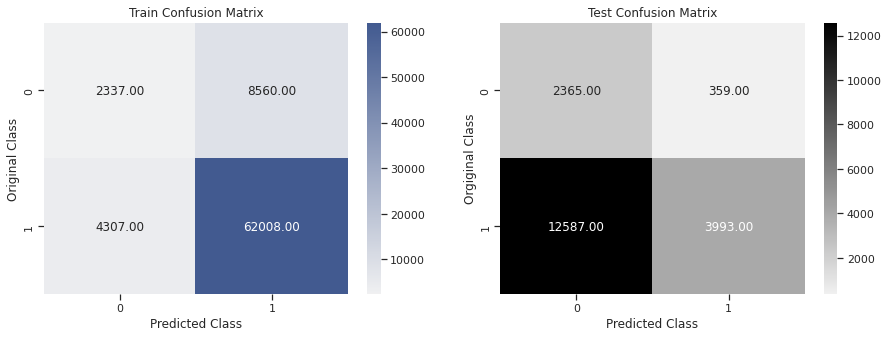

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'feat_md_lr.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [ ]:
# AutoEncoder Model Preparation
n_inputs=x_tr.shape[1]

# define encoder
input_data_shape=Input(shape=(n_inputs,))

#encoder layer 1
encoder=Dense(round(float(n_inputs)/2.0))(input_data_shape)
encoder=BatchNormalization()(encoder)
encoder=LeakyReLU()(encoder)

#encoder layer 2
encoder=Dense(round(float(n_inputs)/3.0))(encoder)
encoder=BatchNormalization()(encoder)
encoder=LeakyReLU()(encoder)

#bottleneck
n_bottleneck=round(float(n_inputs)/4.0)
bottleneck=Dense(n_bottleneck)(encoder)

#Decoder layer 1
decoder=Dense(round(float(n_inputs)/3.0))(bottleneck)
decoder=BatchNormalization()(decoder)
decoder=LeakyReLU()(decoder)

#Decoder layer 2
decoder=Dense(round(float(n_inputs)/2.0))(decoder)
decoder=BatchNormalization()(decoder)
decoder=LeakyReLU()(decoder)


In [ ]:
output=Dense(n_inputs,activation='linear')(decoder)
model=Model(inputs=input_data_shape,outputs=output)
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 448)]             0         
                                                                 
 dense (Dense)               (None, 224)               100576    
                                                                 
 batch_normalization (BatchN  (None, 224)              896       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224)               0         
                                                                 
 dense_1 (Dense)             (None, 149)               33525     
                                                                 
 batch_normalization_1 (Batc  (None, 149)              596       
 hNormalization)                                             

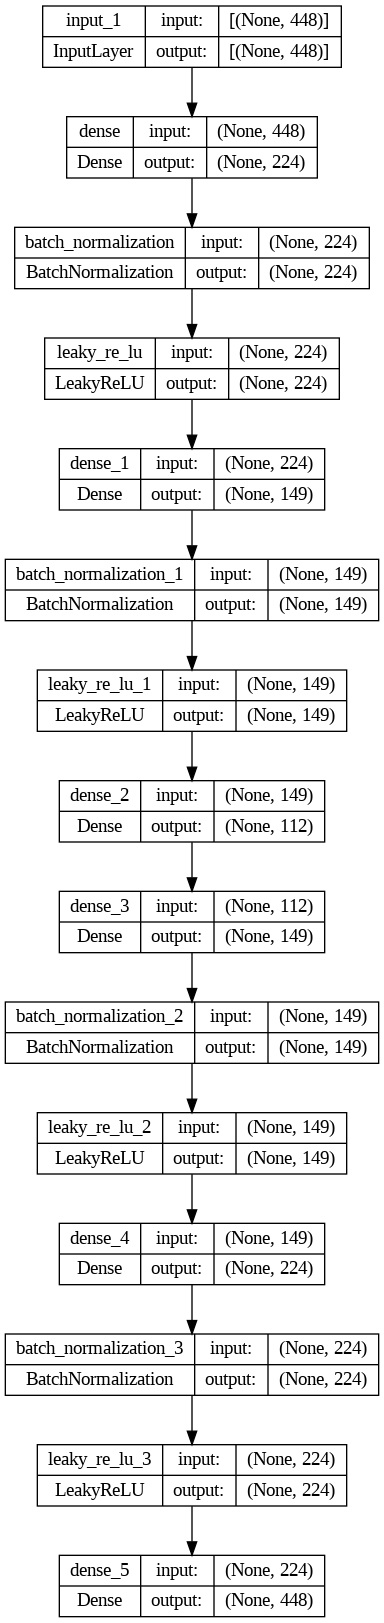

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='encode.png',show_shapes=True,show_layer_names=True)

In [ ]:
x_tr=x_tr.toarray()

In [ ]:
type(x_tr)

numpy.ndarray

In [ ]:
x_te=x_te.toarray()

In [ ]:
type(x_te)

numpy.ndarray

In [ ]:
history=model.fit(x_tr,y_train,epochs=50,batch_size=16,verbose=2,validation_data=(x_te,y_test))

Epoch 1/50
4826/4826 - 29s - loss: 0.1123 - val_loss: 0.1048 - 29s/epoch - 6ms/step
Epoch 2/50
4826/4826 - 25s - loss: 0.1027 - val_loss: 0.0985 - 25s/epoch - 5ms/step
Epoch 3/50
4826/4826 - 25s - loss: 0.1001 - val_loss: 0.0980 - 25s/epoch - 5ms/step
Epoch 4/50
4826/4826 - 25s - loss: 0.0990 - val_loss: 0.0995 - 25s/epoch - 5ms/step
Epoch 5/50
4826/4826 - 25s - loss: 0.0984 - val_loss: 0.0974 - 25s/epoch - 5ms/step
Epoch 6/50
4826/4826 - 24s - loss: 0.0982 - val_loss: 0.0976 - 24s/epoch - 5ms/step
Epoch 7/50
4826/4826 - 25s - loss: 0.0980 - val_loss: 0.0976 - 25s/epoch - 5ms/step
Epoch 8/50
4826/4826 - 25s - loss: 0.0977 - val_loss: 0.0968 - 25s/epoch - 5ms/step
Epoch 9/50
4826/4826 - 25s - loss: 0.0975 - val_loss: 0.0981 - 25s/epoch - 5ms/step
Epoch 10/50
4826/4826 - 24s - loss: 0.0974 - val_loss: 0.0979 - 24s/epoch - 5ms/step
Epoch 11/50
4826/4826 - 25s - loss: 0.0973 - val_loss: 0.0969 - 25s/epoch - 5ms/step
Epoch 12/50
4826/4826 - 28s - loss: 0.0972 - val_loss: 0.0968 - 28s/epoch 

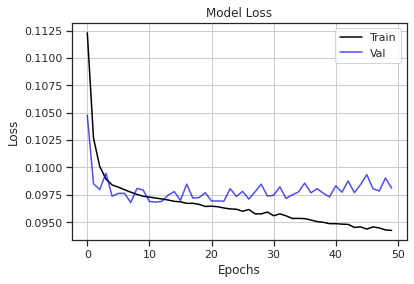

In [ ]:
plt.plot(history.history['loss'],color='black')
plt.plot(history.history['val_loss'],color='blue',alpha=0.7)
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Val'])
plt.grid()
plt.show()

In [ ]:
encoder=Model(inputs=input_data_shape,outputs=bottleneck)
encoder.save('encoder.h5')

In [ ]:
encoder=load_model('encoder.h5')
x_train_encode=encoder.predict(x_tr)
print('x_train_encode:',x_train_encode.shape)
x_test_encode=encoder.predict(x_te)
print('x_test_encode:',x_test_encode.shape)

2413/2413 [==============================] - 6s 2ms/step
x_train_encode: (77212, 112)
604/604 [==============================] - 1s 2ms/step
x_test_encode: (19304, 112)


Alpha: 1e-05 Train Score: 0.7056490301679664 Test Score: 0.7000777903703821
Alpha: 0.0001 Train Score: 0.5988066108118542 Test Score: 0.5881190023347463
Alpha: 0.001 Train Score: 0.6692487901794907 Test Score: 0.6537956116314483
Alpha: 0.01 Train Score: 0.713465855408629 Test Score: 0.7018788111400369
Alpha: 0.1 Train Score: 0.6824578207257066 Test Score: 0.6612052671164285
Alpha: 1 Train Score: 0.7109287739024239 Test Score: 0.695103483574602
Alpha: 10 Train Score: 0.709787145362549 Test Score: 0.6920333686734415
Alpha: 100 Train Score: 0.6984815891577558 Test Score: 0.6858599318813838
Alpha: 1000 Train Score: 0.6605575177421794 Test Score: 0.6498705301797902


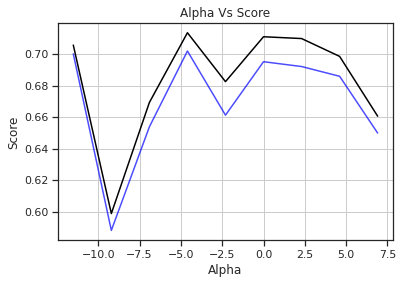

In [ ]:
alpha=[10**x for x in range(-5,4)]
train_scores=[]
test_scores=[]

for i in alpha:
  lr=SGDClassifier(loss='log',penalty='l2',alpha=i,n_jobs=-1,random_state=25)
  lr.fit(x_train_encode,y_train)
  train_sc=f1_score(y_train,lr.predict(x_train_encode),average='macro')
  test_sc=f1_score(y_test,lr.predict(x_test_encode),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Alpha:',i,'Train Score:',train_sc, 'Test Score:',test_sc)
 
plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='blue',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Alpha Vs Score')
plt.grid()

In [ ]:
sgd=SGDClassifier(loss='log',n_jobs=-1,random_state=25)
params={'alpha':[10**x for x in range(-5,4)]}
random_cfl1=RandomizedSearchCV(sgd,param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,return_train_score=True)
random_cfl1.fit(x_train_encode,y_train)

print('mean train scores:',random_cfl1.cv_results_['mean_train_score'])
print('mean test scores:',random_cfl1.cv_results_['mean_test_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
mean train scores: [0.61207911 0.59359235 0.65431552 0.65842897 0.69141027 0.7071064
 0.71432017 0.71060586 0.69468396]
mean test scores: [0.61301579 0.59352835 0.65415788 0.65819546 0.69370466 0.7063409
 0.71416897 0.71043175 0.69457091]


In [ ]:
print('Best Parameters:',random_cfl1.best_params_)
print('Best Score:',random_cfl1.best_score_)

Best Parameters: {'alpha': 10}
Best Score: 0.7141689681409684


In [ ]:
sgd=SGDClassifier(loss='log',alpha=10,n_jobs=-1,random_state=25)
sgd.fit(x_train_encode,y_train)

y_train_pred=sgd.predict(x_train_encode)
y_test_pred=sgd.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.709787145362549
Test f1 score: 0.6920333686734415


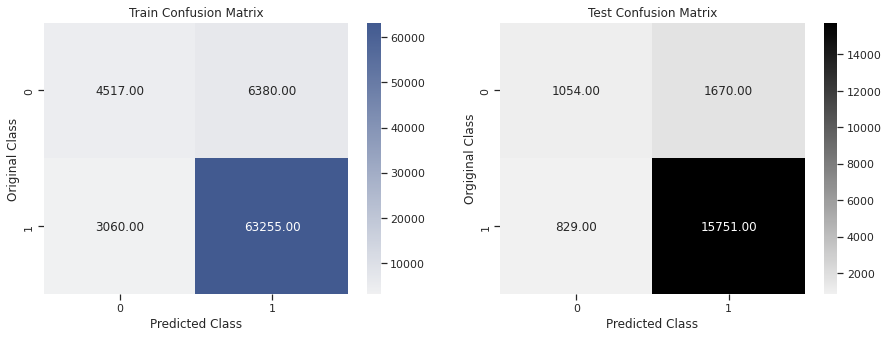

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'encoder.png')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import shutil
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.sparse import hstack
from wordcloud import WordCloud

In [ ]:
x_train=pickle.load(open('x_train.pkl','rb'))
x_test=pickle.load(open('x_test.pkl','rb'))

In [ ]:
x_train.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,...,on_time_delivery,avg_prdt_value,total_order_cost,order_freight_ratio,purchase_dayofweek,is_reviewed,recency,frequency,monetary,RFM_level
88654,delivered,1,credit_card,3,206.01,13224,varzea paulista,SP,177.90,28.11,...,1,177.90,206.01,0.158010,1,1,1667,1,206.01,Champions
61434,delivered,1,credit_card,1,35.00,89051,blumenau,SC,19.90,15.10,...,0,19.90,35.00,0.758794,1,1,1744,1,35.00,Promising
2638,delivered,1,boleto,1,874.67,41290,salvador,BA,699.00,175.67,...,0,699.00,874.67,0.251316,2,1,1694,1,874.67,Champions
49368,delivered,1,credit_card,1,34.77,5425,sao paulo,SP,26.99,7.78,...,1,26.99,34.77,0.288255,1,1,2017,1,34.77,Require Activation
16938,delivered,1,credit_card,1,82.98,6311,carapicuiba,SP,69.90,13.08,...,1,69.90,82.98,0.187124,6,1,1725,1,82.98,Potential


In [ ]:
x_tr=pickle.load(open('x_tr.pkl','rb'))
x_te=pickle.load(open('x_te.pkl','rb'))
y_train=pickle.load(open('y_train.pkl','rb'))
y_test=pickle.load(open('y_test.pkl','rb'))

In [ ]:
encoder=load_model('encoder.h5')

x_train_encode=encoder.predict(x_tr)
print('x train encode:',x_train_encode.shape)

x_test_encode=encoder.predict(x_te)
print('x test encoder:',x_test_encode.shape)

2413/2413 [==============================] - 5s 2ms/step
x train encode: (77212, 112)
604/604 [==============================] - 1s 2ms/step
x test encoder: (19304, 112)


In [ ]:
def confusion_metrices_plot(y_real,y_pred,y_test,y_test_pred,name):
  cmap_=sns.light_palette('black',as_cmap=True)
  cmap=sns.light_palette('blue',as_cmap=True)
  c1=confusion_matrix(y_real,y_pred)
  c2=confusion_matrix(y_test,y_test_pred)

  fig,ax=plt.subplots(1,2,figsize=(15,5))
  ax1=sns.heatmap(c1,cmap=cmap_,annot=True,fmt='.2f',ax=ax[0])
  ax1.set_xlabel('Predicted Class')
  ax1.set_ylabel('Original Class')
  ax1.set_title('Train Confusion Matrix')

  ax2=sns.heatmap(c2,cmap=cmap,annot=True,fmt='.2f',ax=ax[1])
  ax2.set_xlabel('Predicted Class')
  ax2.set_ylabel('Original Class')
  ax2.set_title('Test Confusion Matrix')
  plt.show()

**Linear SVM Model**

Alpha: 1e-05 Train Score: 0.7140115848413007 Test Score: 0.7079430934330966
Alpha: 0.0001 Train Score: 0.7061261075609179 Test Score: 0.6957222056134956
Alpha: 0.001 Train Score: 0.5690534005974955 Test Score: 0.5536317436126491
Alpha: 0.01 Train Score: 0.712448794809589 Test Score: 0.7023915417509958
Alpha: 0.1 Train Score: 0.7130296685763755 Test Score: 0.7065079715515408
Alpha: 1 Train Score: 0.7101063540906458 Test Score: 0.7094357409733526
Alpha: 10 Train Score: 0.7085898538968742 Test Score: 0.7019376739264225
Alpha: 100 Train Score: 0.7018700099982602 Test Score: 0.6946626569607146
Alpha: 1000 Train Score: 0.6814953822628841 Test Score: 0.6681194885144985


Text(0.5, 1.0, 'Alpha Vs Score')

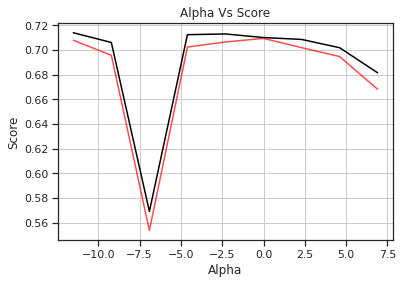

In [ ]:
alpha=[10**x for x in range(-5,4)]
train_scores=[]
test_scores=[]

for i in alpha:
  lr=SGDClassifier(loss='hinge',penalty='l2',alpha=i,n_jobs=-1,random_state=25)
  lr.fit(x_train_encode,y_train)
  train_sc=f1_score(y_train,lr.predict(x_train_encode),average='macro')
  test_sc=f1_score(y_test,lr.predict(x_test_encode),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Alpha:',i,'Train Score:',train_sc,'Test Score:',test_sc)

plt.plot(np.log(alpha),train_scores,label='Train Score',color='black')
plt.plot(np.log(alpha),test_scores,label='Test Score',color='red',alpha=0.7)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.grid()
plt.title('Alpha Vs Score')

In [ ]:
sgd=SGDClassifier(loss='hinge',n_jobs=-1,random_state=25)

params={'alpha':[10**x for x in range(-5,4)]}

random_cfl1=RandomizedSearchCV(sgd,param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,return_train_score=True)
random_cfl1.fit(x_train_encode,y_train)

print('Mean Train Score:',random_cfl1.cv_results_['mean_train_score'])
print('Mean Test Score:',random_cfl1.cv_results_['mean_test_score'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mean Train Score: [0.62619797 0.61416014 0.66974004 0.69127796 0.69031633 0.71104086
 0.71029489 0.71075982 0.71146432]
Mean Test Score: [0.62453028 0.617055   0.66963126 0.69129051 0.68997994 0.71122427
 0.71024983 0.71077257 0.71137555]


In [ ]:
print('Best Parameters:',random_cfl1.best_params_)
print('Best Score:',random_cfl1.best_score_)

Best Parameters: {'alpha': 1000}
Best Score: 0.7113755536492132


In [ ]:
sgd=SGDClassifier(loss='hinge',alpha=10,n_jobs=-1,random_state=25)
sgd.fit(x_train_encode,y_train)

y_train_pred=sgd.predict(x_train_encode)
y_test_pred=sgd.predict(x_test_encode)

print('Train F1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test F1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train F1 score: 0.7085898538968742
Test F1 score: 0.7019376739264225


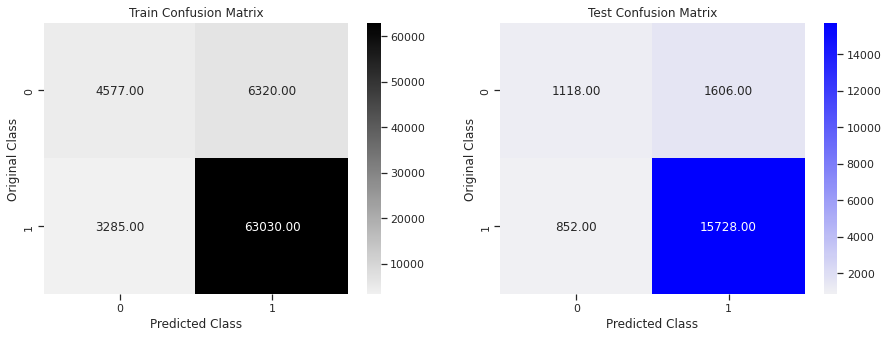

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'svm.png')

**Decision Tree**

Depth 3 Train Score 0.7055230924670799 Test Score 0.6877757090662824
Depth 10 Train Score 0.7298673179137191 Test Score 0.6778476193112509
Depth 50 Train Score 0.784968306380845 Test Score 0.6543807350356536
Depth 100 Train Score 0.7850314534468796 Test Score 0.6552714226724744
Depth 250 Train Score 0.7850314534468796 Test Score 0.6552714226724744
Depth 500 Train Score 0.7850314534468796 Test Score 0.6552714226724744


Text(0.5, 1.0, 'Depth Vs Score')

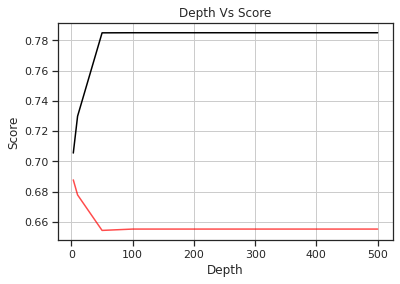

In [ ]:
from sklearn.tree import DecisionTreeClassifier

depth=[3,10,50,100,250,500]
train_scores=[]
test_scores=[]

for i in depth:
  clf=DecisionTreeClassifier(max_depth=i,random_state=25)
  clf.fit(x_train_encode,y_train)
  train_sc=f1_score(y_train,clf.predict(x_train_encode),average='macro')
  test_sc=f1_score(y_test,clf.predict(x_test_encode),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Depth',i,'Train Score',train_sc,'Test Score',test_sc)

plt.plot(depth,train_scores,label='Train Score',color='black')
plt.plot(depth,test_scores,label='Test Score',color='red',alpha=0.7)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.grid()
plt.title('Depth Vs Score')


In [ ]:
from scipy.stats import randint as sp_randint

dt=DecisionTreeClassifier(random_state=25)
params={'max_depth':sp_randint(3,500),'min_samples_split':sp_randint(50,200),'min_samples_leaf':sp_randint(2,50)}

random_cfl1=RandomizedSearchCV(dt,param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,return_train_score=True)
random_cfl1.fit(x_train_encode,y_train)

print('Mean Train Score:',random_cfl1.cv_results_['mean_train_score'])
print('Mean Test Score:',random_cfl1.cv_results_['mean_test_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Train Score: [0.70758524 0.7087354  0.72128115 0.70985754 0.72160784 0.72198468
 0.7354572  0.71128973 0.71106372 0.70880859]
Mean Test Score: [0.68917659 0.68943393 0.68184048 0.69278397 0.68021943 0.68099566
 0.67213806 0.68915435 0.68803703 0.6868039 ]


In [ ]:
print('Best Parameters:',random_cfl1.best_params_)
print('Best Score:',random_cfl1.best_score_)

Best Parameters: {'max_depth': 256, 'min_samples_leaf': 33, 'min_samples_split': 179}
Best Score: 0.6927839743142438


In [ ]:
dt=DecisionTreeClassifier(max_depth=135,min_samples_leaf=28,min_samples_split=193)
dt.fit(x_train_encode,y_train)

y_train_pred=dt.predict(x_train_encode)
y_test_pred=dt.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.7080243462950757
Test f1 score: 0.6727164942786964


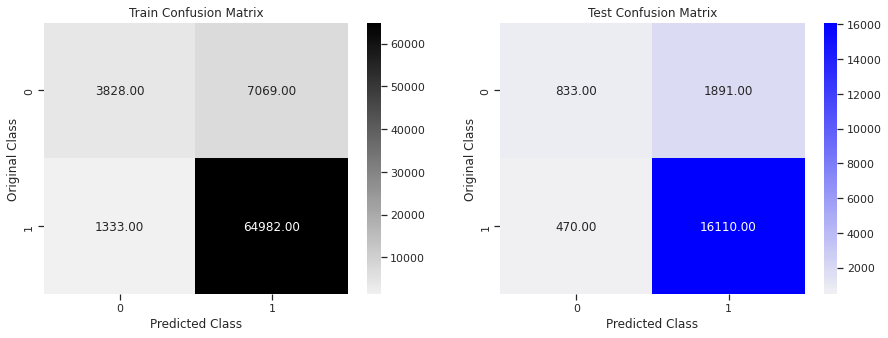

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'dt.png')

**RandomForest Classifier**

Estimators: 5 Train Score 0.7050370309325916 Test score: 0.6820895286555333
Estimators: 10 Train Score 0.7036806267167617 Test score: 0.6807092409732215
Estimators: 50 Train Score 0.7038720387108202 Test score: 0.680843428783484
Estimators: 100 Train Score 0.7045945762071144 Test score: 0.6802977116433258
Estimators: 250 Train Score 0.7048099781746066 Test score: 0.6802296098711896
Estimators: 500 Train Score 0.7042778117456564 Test score: 0.6806360863972706


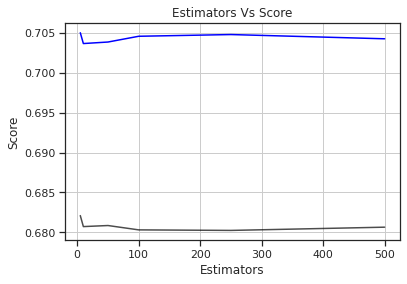

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimators=[5,10,50,100,250,500]
train_scores=[]
test_scores=[]

for i in estimators:
  clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
  clf.fit(x_train_encode,y_train)
  train_sc=f1_score(y_train,clf.predict(x_train_encode),average='macro')
  test_sc=f1_score(y_test,clf.predict(x_test_encode),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Estimators:',i,'Train Score',train_sc,'Test score:',test_sc)

plt.plot(estimators,train_scores,label='Train Score',color='blue')
plt.plot(estimators,test_scores,label='Test Score',color='black',alpha=0.7)
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators Vs Score')
plt.grid()
  

Depth= 3 Train Score= 0.701548672153195 Test Score= 0.6827046512435028
Depth= 9 Train Score= 0.7084750217246356 Test Score= 0.679954538567853
Depth= 11 Train Score= 0.709550289731309 Test Score= 0.6799515462651383
Depth= 15 Train Score= 0.7099707581124002 Test Score= 0.6798154567712846
Depth= 20 Train Score= 0.709544586490537 Test Score= 0.679611509958314
Depth= 35 Train Score= 0.7105012209714909 Test Score= 0.6807819505321703
Depth= 50 Train Score= 0.7105012209714909 Test Score= 0.6807819505321703
Depth= 70 Train Score= 0.7105012209714909 Test Score= 0.6807819505321703
Depth= 130 Train Score= 0.7105012209714909 Test Score= 0.6807819505321703


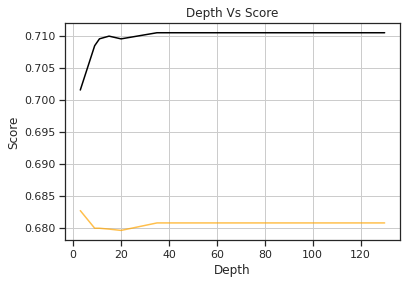

In [ ]:
depths=[3,9,11,15,20,35,50,70,130]
train_scores=[]
test_scores=[]

for i in depths:
  clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
  clf.fit(x_train_encode,y_train)
  train_sc=f1_score(y_train,clf.predict(x_train_encode),average='macro')
  test_sc=f1_score(y_test,clf.predict(x_test_encode),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)
  print('Depth=',i,'Train Score=',train_sc,'Test Score=',test_sc)

plt.plot(depths,train_scores,label='Train Score',color='black')
plt.plot(depths,test_scores,label='Test Score',color='orange',alpha=0.7)
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth Vs Score')
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [ ]:
clf=RandomForestClassifier(random_state=25,n_jobs=-1)

params={"n_estimators":sp_randint(105,125),
        "max_depth": sp_randint(10,15),
        "min_samples_split": sp_randint(110,190),
        "min_samples_leaf": sp_randint(25,65)}

rf_random=RandomizedSearchCV(clf,param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,return_train_score=True)
rf_random.fit(x_train_encode,y_train)

print('Mean train scores:',rf_random.cv_results_['mean_train_score'])
print('Mean test scores:',rf_random.cv_results_['mean_test_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean train scores: [0.70828014 0.70911894 0.70730902 0.70760586 0.71033723 0.70792898
 0.70829888 0.7089712  0.7075239  0.70773387]
Mean test scores: [0.70169685 0.70174324 0.70169941 0.70157893 0.69998242 0.70167231
 0.70185019 0.70113412 0.70195965 0.70127279]


In [ ]:
print('Best Parameters:',rf_random.best_params_)
print('Best Score:',rf_random.best_score_)

Best Parameters: {'max_depth': 14, 'min_samples_leaf': 61, 'min_samples_split': 140, 'n_estimators': 110}
Best Score: 0.7019596464749391


In [ ]:
rf_classifier=RandomForestClassifier(max_depth=13,min_samples_leaf=49,min_samples_split=165,n_estimators=108)
rf_classifier.fit(x_train_encode,y_train)

y_train_pred=rf_classifier.predict(x_train_encode)
y_test_pred=rf_classifier.predict(x_test_encode)

print('Train f1 score=',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score=',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score= 0.708926377025813
Test f1 score= 0.6796729254862961


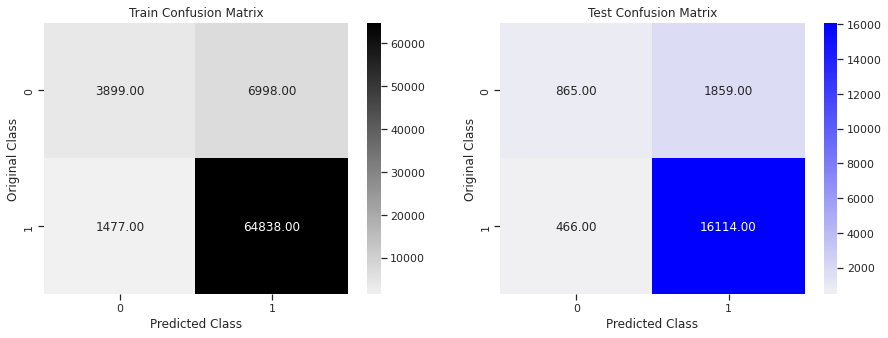

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'rf.png')

**LGBM**



In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


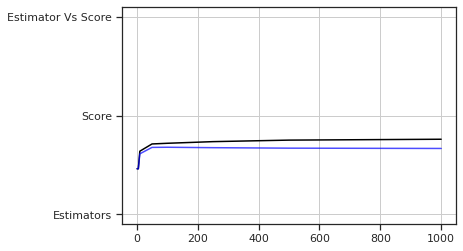

In [ ]:
from lightgbm import LGBMClassifier
estimators=[1,3,5,10,50,100,250,500,1000]
train_scores=[]
test_scores=[]

for i in estimators:
  clf=LGBMClassifier(n_estimators=i,n_jobs=-1,random_state=25)
  clf.fit(x_train_encode,y_train)
  train_sc=f1_score(y_train,clf.predict(x_train_encode),average='macro')
  test_sc=f1_score(y_test,clf.predict(x_test_encode),average='macro')
  train_scores.append(train_sc)
  test_scores.append(test_sc)

plt.plot(estimators,train_scores,label='Train Score',color='black')
plt.plot(estimators,test_scores,label='Test Score',color='blue',alpha=0.7)
plt.plot('Estimators')
plt.plot('Score')
plt.plot('Estimator Vs Score')
plt.grid()

In [ ]:
x_cfl=LGBMClassifier(n_jobs=-1,random_state=25)

params={'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators':[1,3,5,10,50,100,250,500,1000],
        'max_depth':[3,5,10,15,20,50],
        'colsample_bytree':[0.1,0.3,0.5,1],
        'subsample':[0.1,0.3,0.5,1]}

random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=params,verbose=10,scoring='f1_macro',n_jobs=-1,random_state=25,return_train_score=True)
random_cfl1.fit(x_train_encode,y_train)

print('Mean Train score:',random_cfl1.cv_results_['mean_train_score'])
print('Mean Test score:',random_cfl1.cv_results_['mean_test_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Train score: [0.74795905 0.71175481 0.71295225 0.72062427 0.4620385  0.722955
 0.70683723 0.4620385  0.60503258 0.4620385 ]
Mean Test score: [0.68963758 0.70315083 0.70348084 0.70153194 0.4620385  0.69718554
 0.70371889 0.4620385  0.60301921 0.4620385 ]


In [ ]:
print('Best Parameters:',random_cfl1.best_params_)
print('Best Score:',random_cfl1.best_score_)

Best Parameters: {'subsample': 0.5, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.3}
Best Score: 0.7037188863242845


In [ ]:
lgbm=LGBMClassifier(subsample=0.5,n_estimators=250,max_depth=3,learning_rate=0.03,colsample_bytree=0.3)
lgbm.fit(x_train_encode,y_train)

y_train_pred=lgbm.predict(x_train_encode)
y_test_pred=lgbm.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.7061757053314601
Test f1 score: 0.6798244403897014


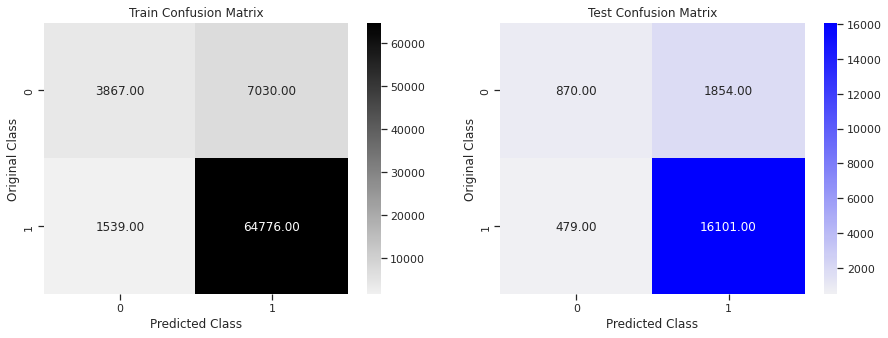

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'lgbm.png')

**5. XGB Classifier**

In [ ]:
from xgboost import XGBClassifier
import random
from scipy.stats import randint as sp_randint
clf=XGBClassifier()
params={"n_estimators":sp_randint(105,125),
        "eta":[round(random.uniform(0.1, 1.0 ), 1) for i in range(0,20)]}

xg_random=RandomizedSearchCV(clf,param_distributions=params,scoring='f1_macro',n_iter=5,cv=3,n_jobs=-1,random_state=25,return_train_score=True)
xg_random.fit(x_train_encode,y_train)

print('Mean Train score:',xg_random.cv_results_['mean_train_score'])
print('Mean Test score:',xg_random.cv_results_['mean_test_score'])

Mean Train score: [0.71079794 0.7108797  0.7102422  0.71009682 0.71006481]
Mean Test score: [0.70432824 0.70419579 0.70426816 0.70418635 0.70412298]


In [ ]:
print(xg_random.best_estimator_)

XGBClassifier(eta=0.2, n_estimators=120)


In [ ]:
clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=108, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf.fit(x_tr,y_train)
y_train_pred=clf.predict(x_tr)
y_test_pred=clf.predict(x_te)

In [ ]:
print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.6869753418286797
Test f1 score: 0.6929863433001916


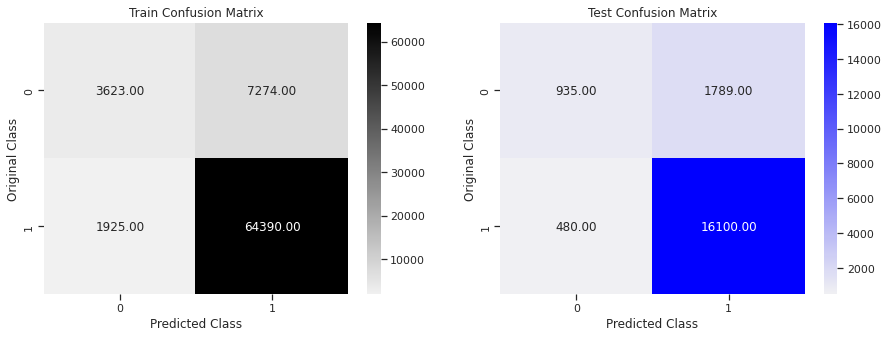

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'xgboost.png')

**6. Adaboost Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
x_cfl=AdaBoostClassifier(random_state=25)
params={'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
       'n_estimators':[1,3,5,10,50,100,250,500,1000]}

random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=params,verbose=10,n_jobs=-1,random_state=25,scoring='f1_macro')
random_cfl1.fit(x_train_encode,y_train)

print('Mean Train score:',f1_score(y_train,random_cfl1.predict(x_train_encode),average='macro'))
print('Mean Test score:',f1_score(y_test,random_cfl1.predict(x_test_encode),average='macro'))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mean Train score: 0.7077123240402391
Mean Test score: 0.6909323123313407


In [ ]:
print('Best parameters:',random_cfl1.best_params_)
print('Best Score:',random_cfl1.best_score_)

Best parameters: {'n_estimators': 10, 'learning_rate': 0.01}
Best Score: 0.7082538329917584


In [ ]:
ada=AdaBoostClassifier(n_estimators=1,learning_rate= 0.001,random_state=25)
ada.fit(x_train_encode,y_train)

y_train_pred=ada.predict(x_train_encode)
y_test_pred=ada.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.7072375440750053
Test f1 score: 0.689662018090461


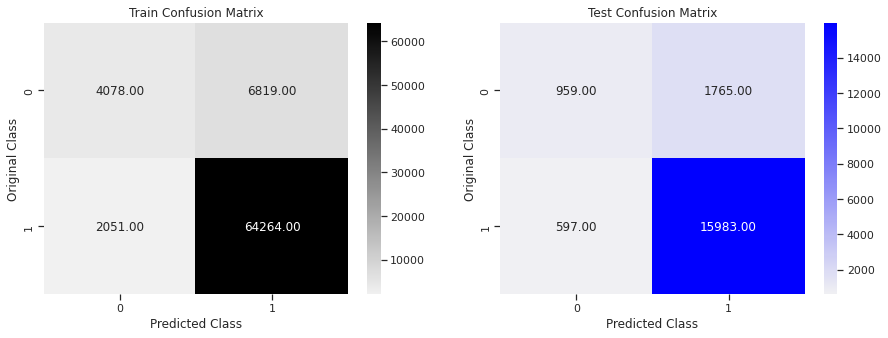

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'ada.png')

### 8.**StackingClassifier**

In [ ]:
# defining the base models
est0=list()
est0.append(('lr',SGDClassifier(loss='log',alpha=0.1,n_jobs=-1,random_state=25)))
est0.append(('svm', SGDClassifier(loss='hinge',alpha=1,n_jobs=-1,random_state=25)))
est0.append(('dt', DecisionTreeClassifier(max_depth=135,min_samples_leaf=28,min_samples_split=193,random_state=25)))
est0.append(('rf', RandomForestClassifier(max_depth=13,min_samples_leaf=49,min_samples_split=165,n_estimators=108,random_state=25,n_jobs=-1)))
est0.append(('xgb', XGBClassifier(n_estimators=123,max_depth=3,subsample=1,learning_rate=0.1,colsample_bytree=1,n_jobs=-1,random_state=25)))

In [ ]:
est_final=SGDClassifier(loss='log',n_jobs=-1,random_state=25)

In [ ]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=est0,final_estimator=est_final,n_jobs=-1)
clf.fit(x_train_encode,y_train)

y_train_pred=clf.predict(x_train_encode)
y_test_pred=clf.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.6882459823259988
Test f1 score: 0.6597018008965201


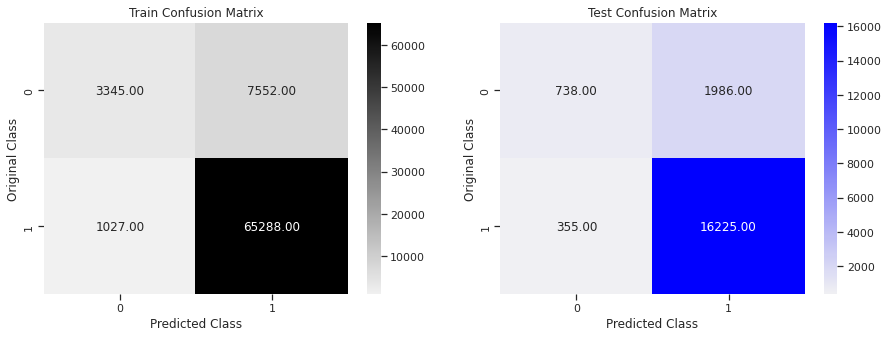

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'stack.png')

### **9.VotingClassifier**



In [ ]:
est0=list()
est0.append(('lr',SGDClassifier(loss='log',alpha=0.1,random_state=25,n_jobs=-1)))
est0.append(('dt',DecisionTreeClassifier(max_depth=135,min_samples_leaf=28,min_samples_split=193,random_state=25)))
est0.append(('rf',RandomForestClassifier(max_depth=13,min_samples_leaf=49,min_samples_split=165,n_estimators=108,random_state=25,n_jobs=-1)))
est0.append(('xgb',XGBClassifier(n_estimators=123,max_depth=3,subsample=1,learning_rate=0.1,colsample_bytree=1,random_state=25,n_jobs=-1)))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_hard=VotingClassifier(estimators=est0,voting='hard')
vot_hard.fit(x_train_encode,y_train)

y_train_pred=vot_hard.predict(x_train_encode)
y_test_pred=vot_hard.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.7090665627941558
Test f1 score: 0.6804437453698846


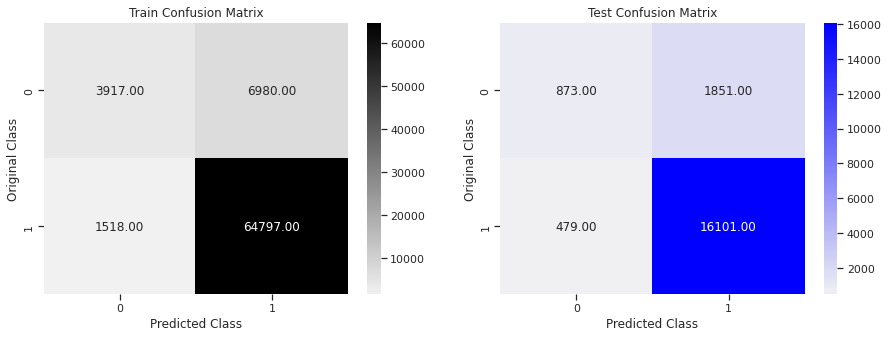

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'votclf_1.png')

In [ ]:
# Voting Classifier with soft voting

vot_soft=VotingClassifier(estimators=est0,voting='soft')
vot_soft.fit(x_train_encode,y_train)

y_train_pred=vot_soft.predict(x_train_encode)
y_test_pred=vot_soft.predict(x_test_encode)

print('Train f1 score:',f1_score(y_train,y_train_pred,average='macro'))
print('Test f1 score:',f1_score(y_test,y_test_pred,average='macro'))

Train f1 score: 0.7074580376023761
Test f1 score: 0.6785663749088179


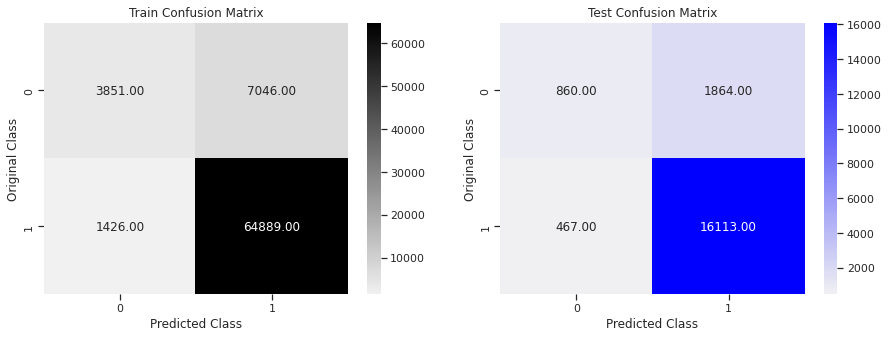

In [ ]:
confusion_metrices_plot(y_train,y_train_pred,y_test,y_test_pred,'votclf_2.png')

***Summary***

In [ ]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "Hyper parameter", "test f1-Score"]
x.add_row(['logistic ','alpha=10','0.63545'])
x.add_row(['Regression',' ',' '])
x.add_row([' ',' ',' '])
x.add_row(['Linear SVM','alpha=10','0.699314'])
x.add_row([' ',' ',' '])
x.add_row(['Decision Tree','max_depth=135','0.66602'])
x.add_row([' ','min_samples_leaf= 28,min_samples_split=193',' '])
x.add_row([' ',' ',' '])
x.add_row(['Random Forest','max_depth =13, min_samples_leaf=49','0.681056'])
x.add_row([' ','min_samples_split =165,n_estimators=108',' '])
x.add_row([' ',' ',' '])
x.add_row(['XGBclassifier','n_estimators=120, max_depth=3','0.69298'])
x.add_row([' ','subsample=0.5,learning_rate=0.1,colsample_bytree=1',' '])
x.add_row([' ',' ',' '])
x.add_row(['LGBMClassifier','n_estimators=250, max_depth=3','0.68229'])
x.add_row([' ','subsample=0.5,learning_rate=0.03,colsample_bytree=0.3',' '])
x.add_row([' ',' ',' '])
x.add_row(['AdaBoost','n_estimators=1, learning_rate=0.001','0.68584'])
x.add_row([' ',' ',' '])
x.add_row(['StackingClassifier','estimators=est0, final_estimator = est_final','0.66506'])
x.add_row([' ',' ',' '])
x.add_row(['VotingClassifier',' ',' '])
x.add_row(['vot_hard','estimators = est0, voting =hard','0.68045'])
x.add_row(['vot_soft','estimators = est0, voting = soft','0.66974'])
x.add_row([' ',' ',' '])
print(x)

+--------------------+-------------------------------------------------------+---------------+
|       Model        |                    Hyper parameter                    | test f1-Score |
+--------------------+-------------------------------------------------------+---------------+
|     logistic       |                        alpha=10                       |    0.63545    |
|     Regression     |                                                       |               |
|                    |                                                       |               |
|     Linear SVM     |                        alpha=10                       |    0.699314   |
|                    |                                                       |               |
|   Decision Tree    |                     max_depth=135                     |    0.66602    |
|                    |       min_samples_leaf= 28,min_samples_split=193      |               |
|                    |                            